In this file we do not revove the outliers and mak an oversampling on the impalanced data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('/content/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.duplicated().sum()

1081

In [4]:
df.drop_duplicates(inplace=True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [6]:
df.fillna(0, inplace=True)
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [8]:
#get the numerical colmns in the data
numerical_cols = df.select_dtypes(include=np.number).columns
numerical_cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
numerical_columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


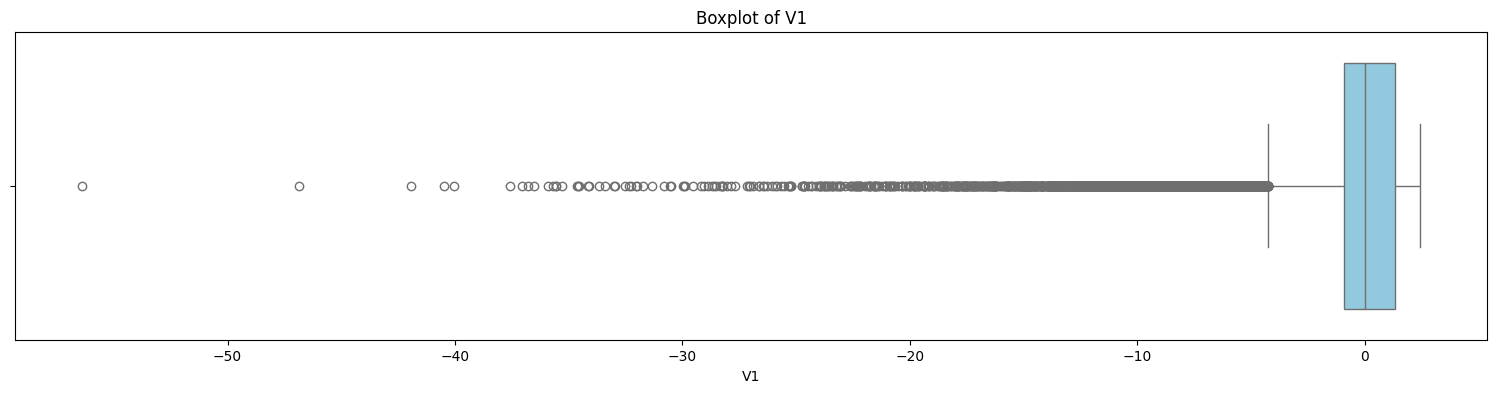

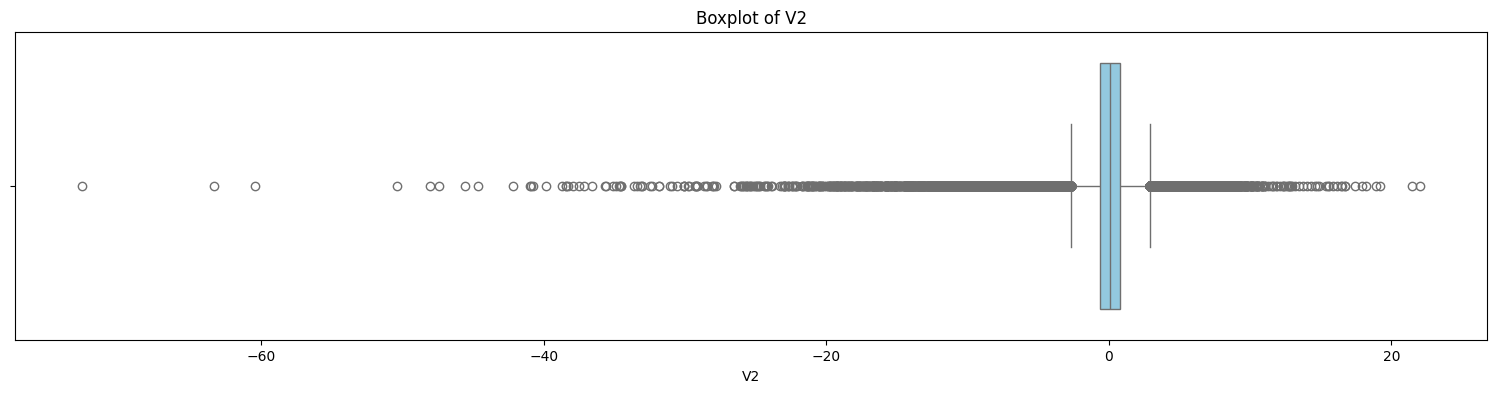

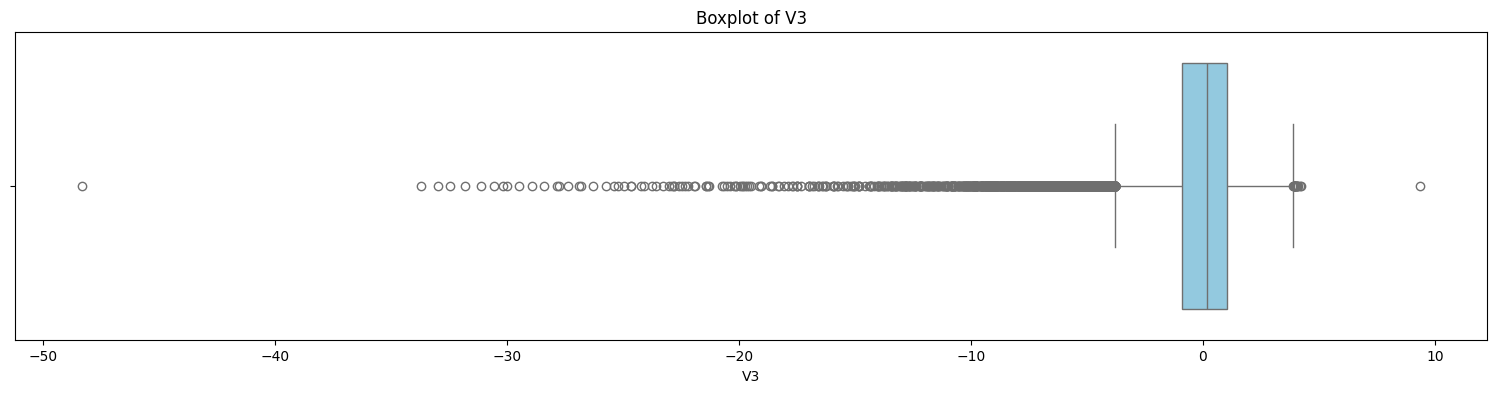

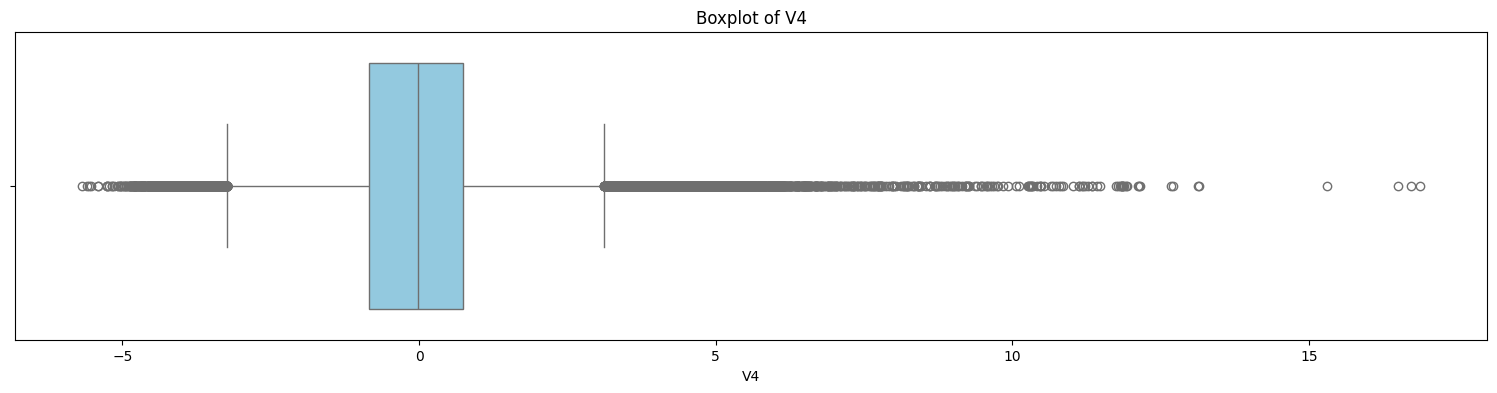

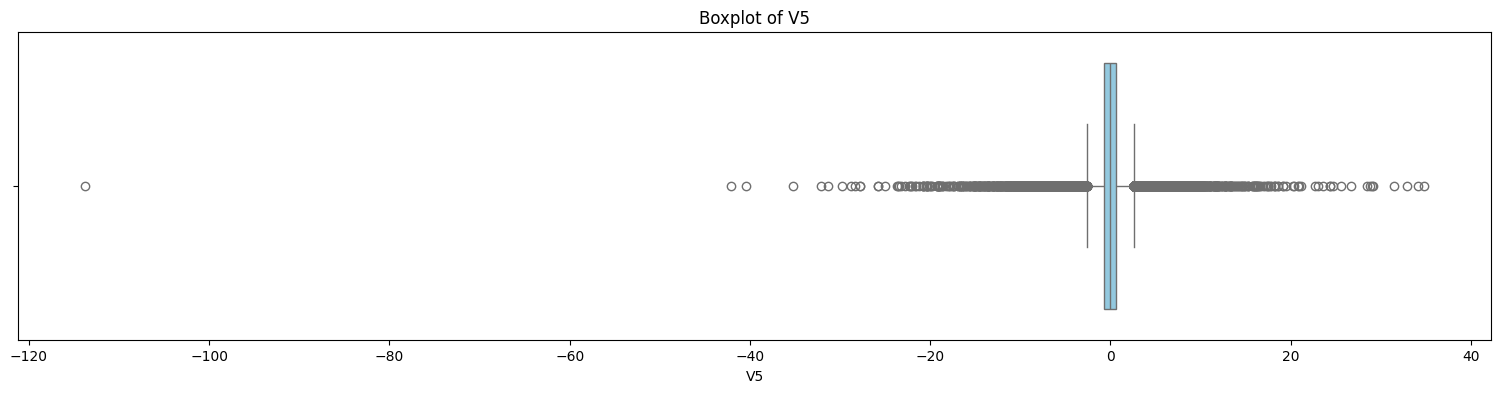

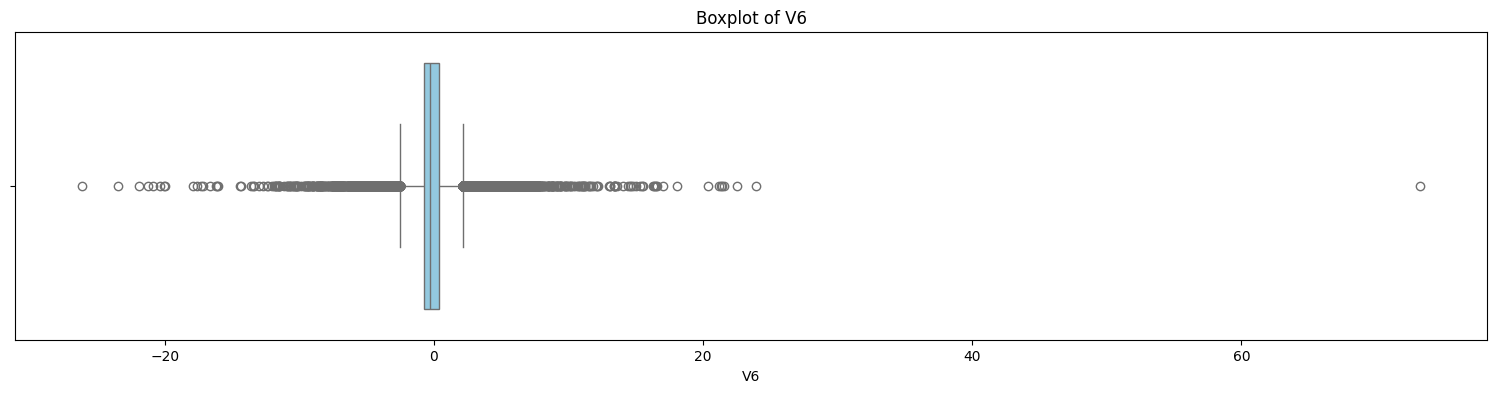

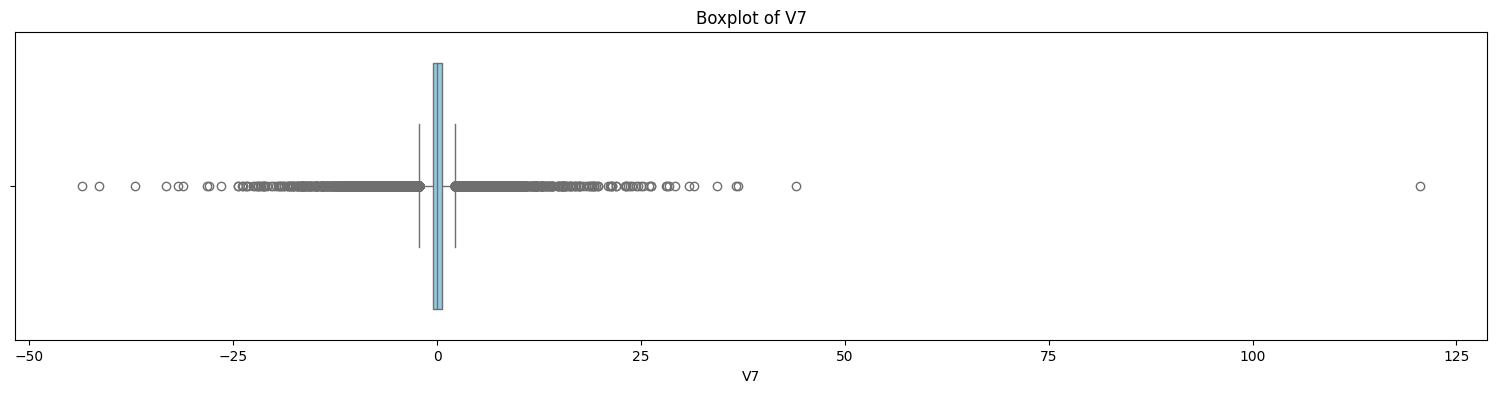

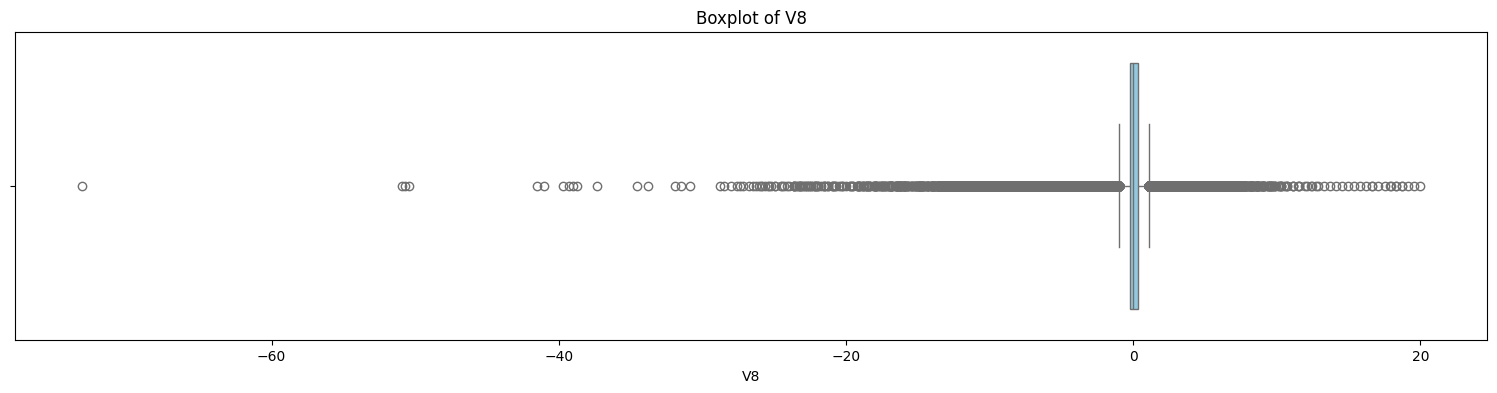

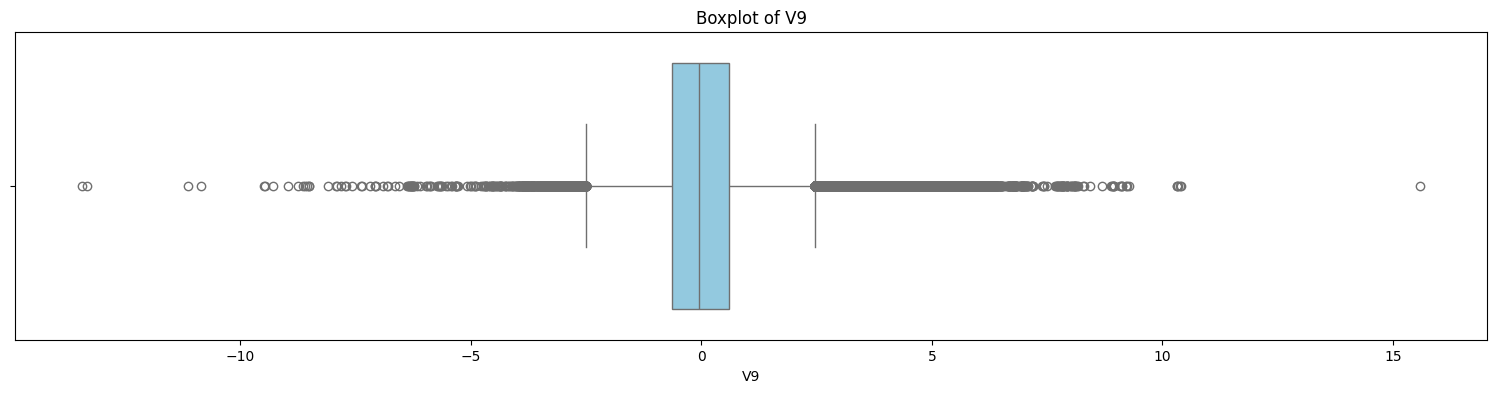

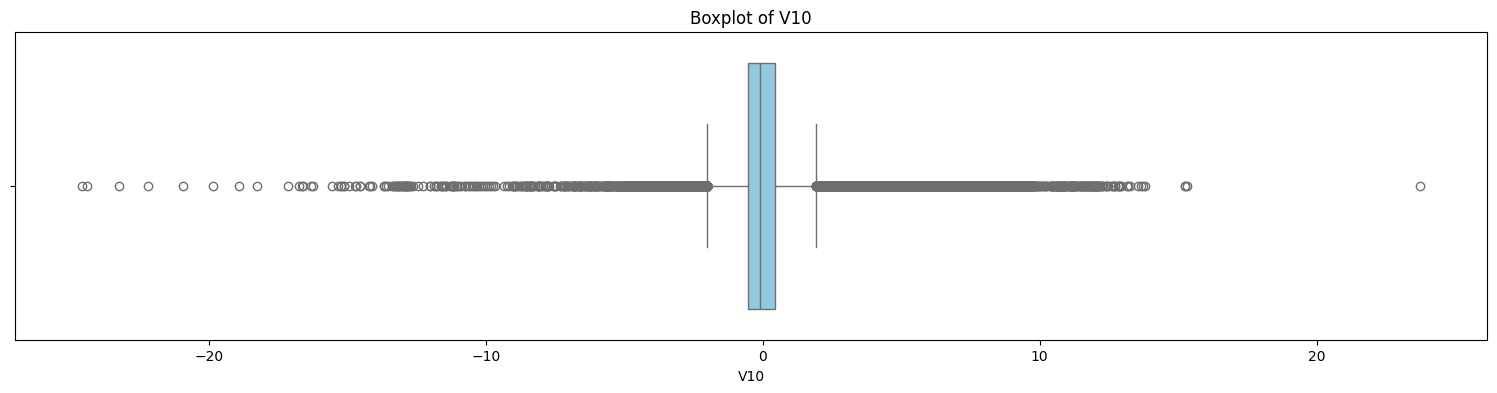

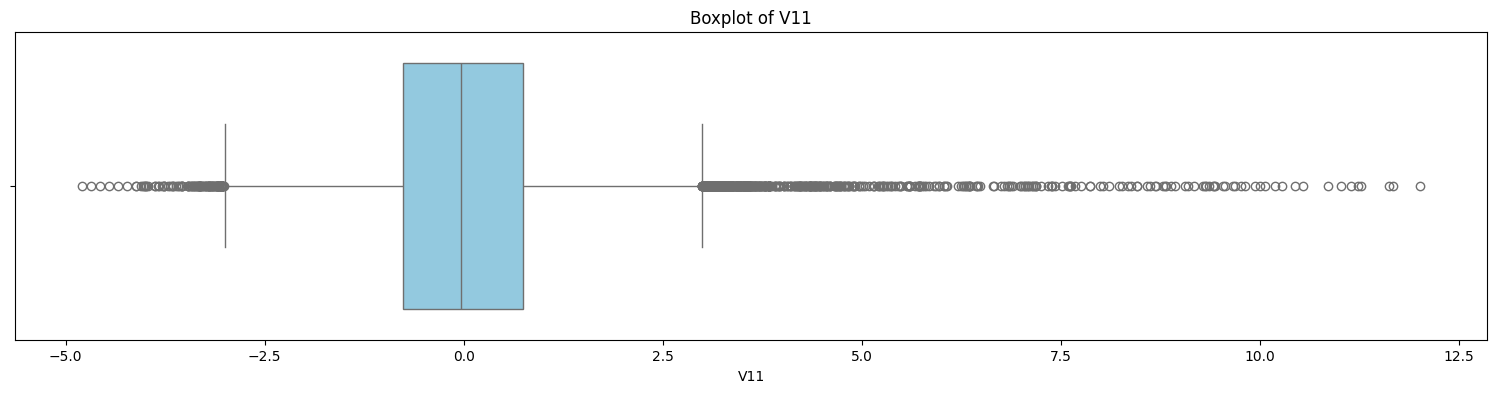

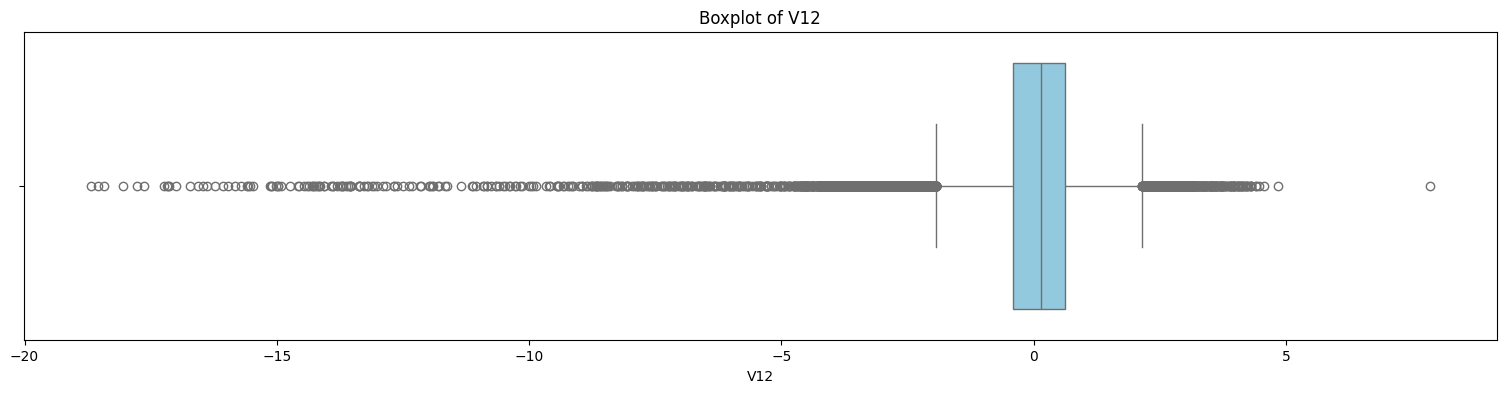

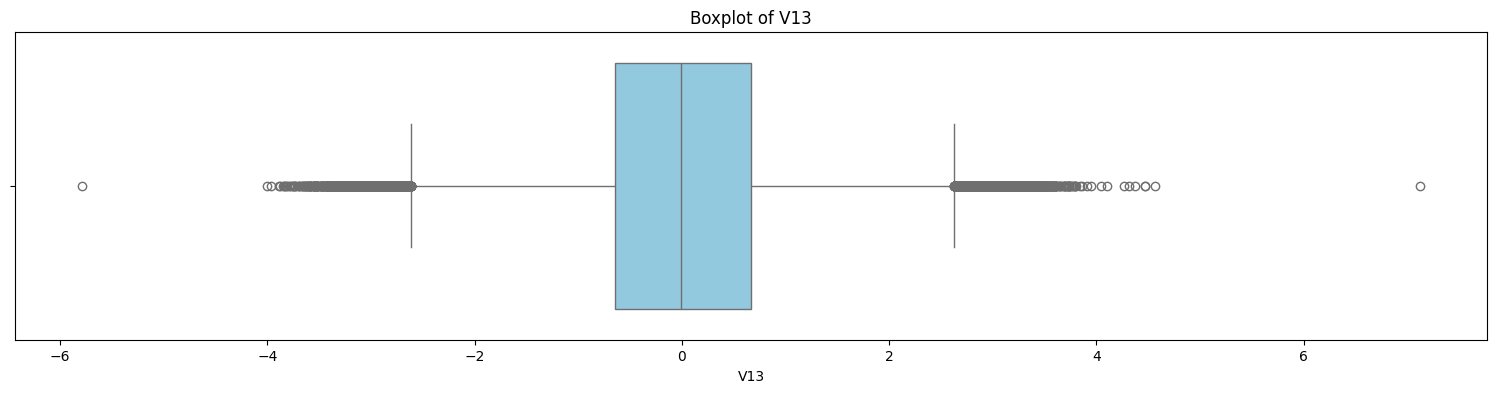

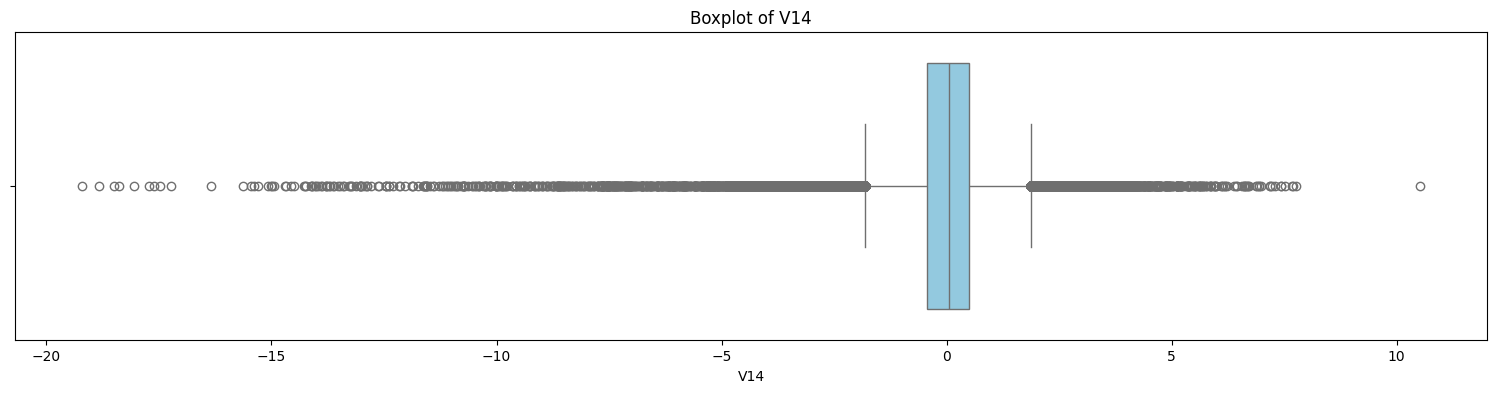

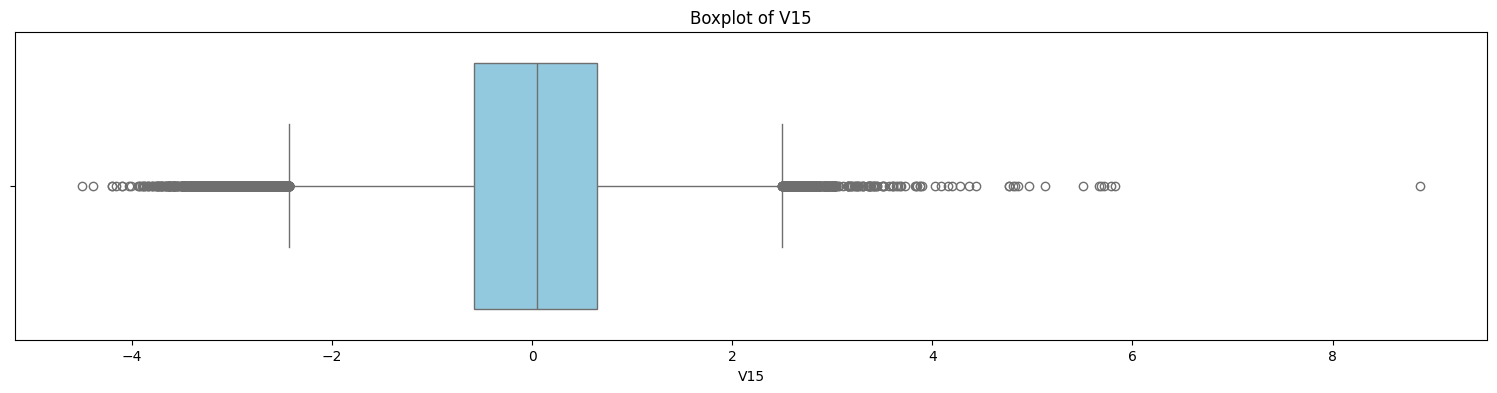

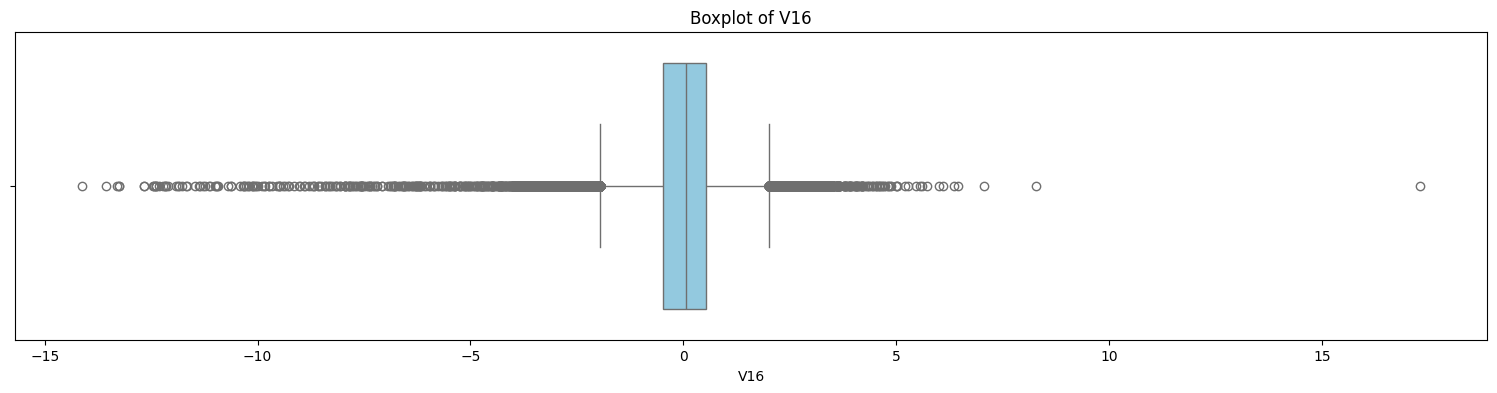

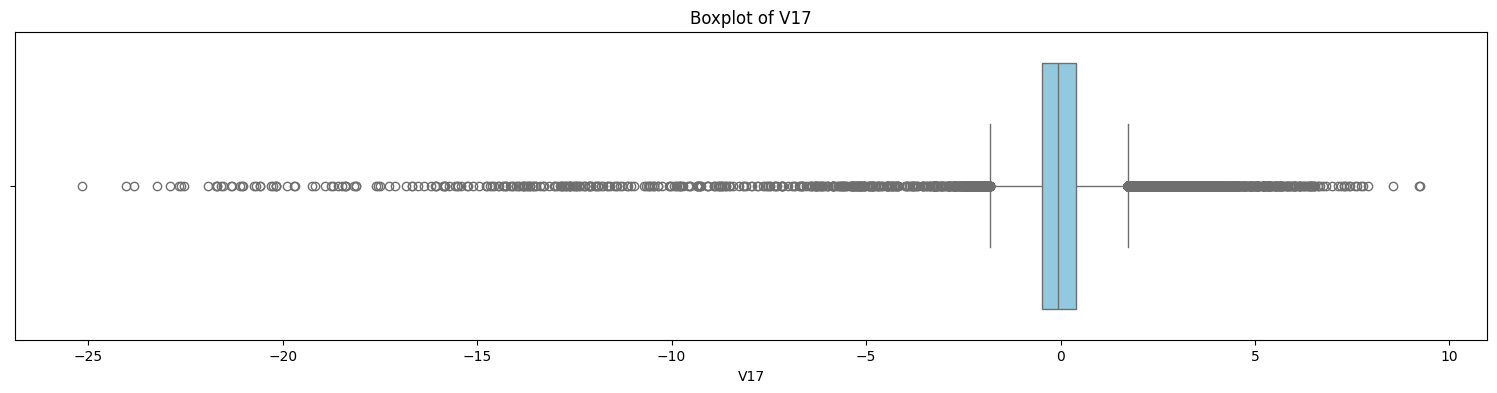

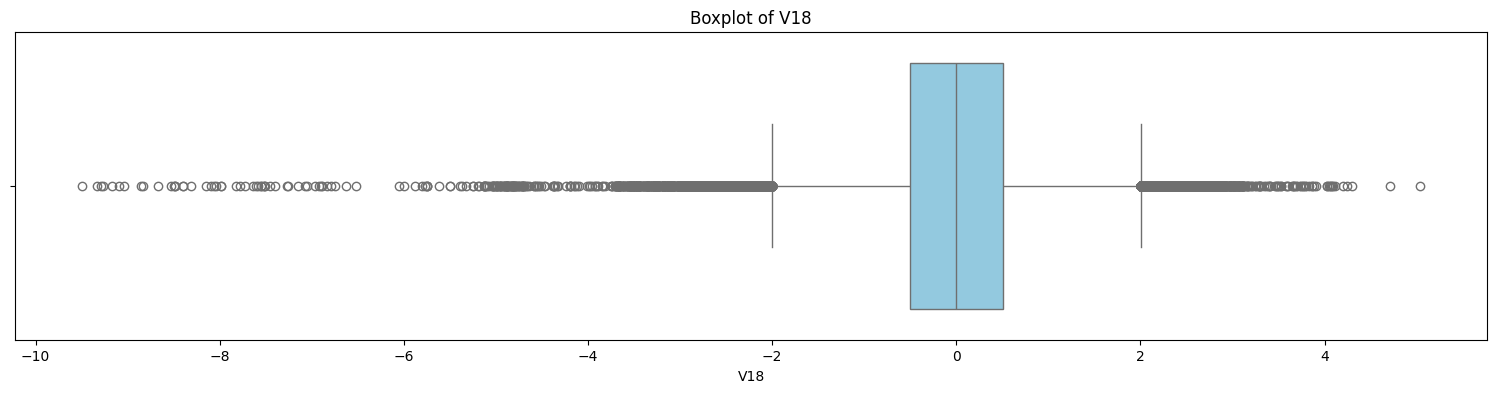

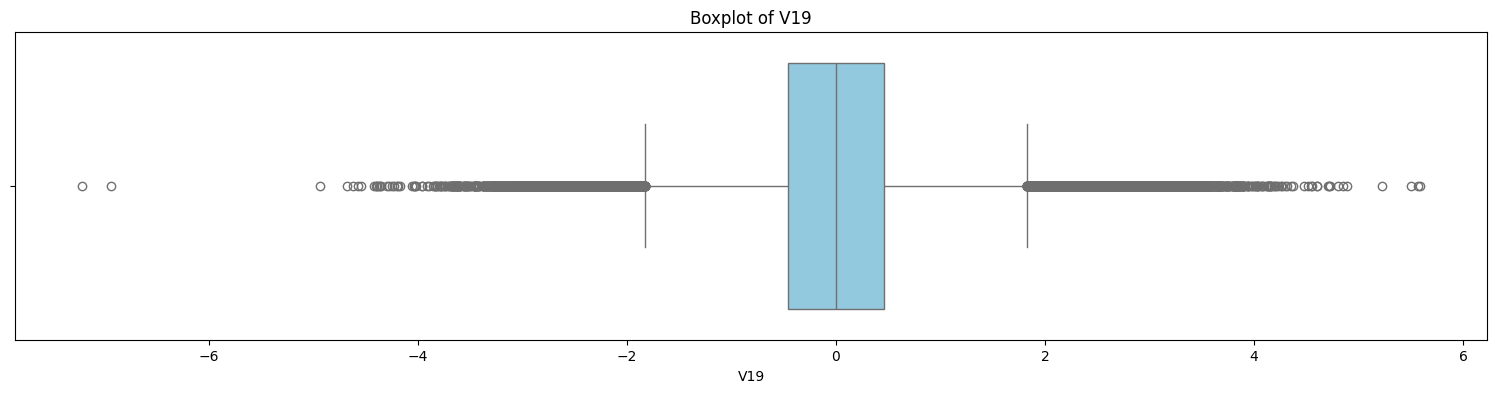

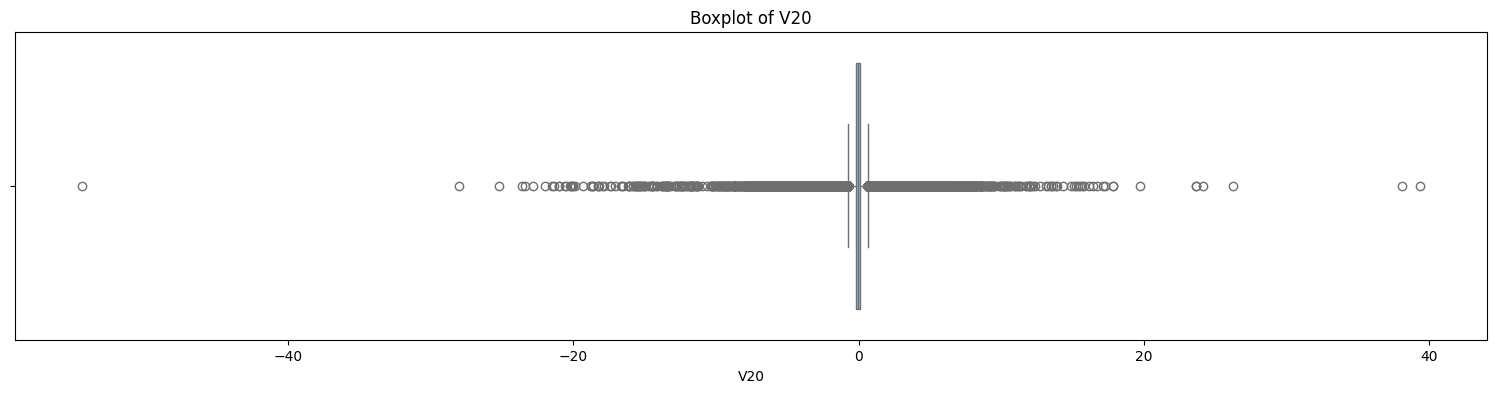

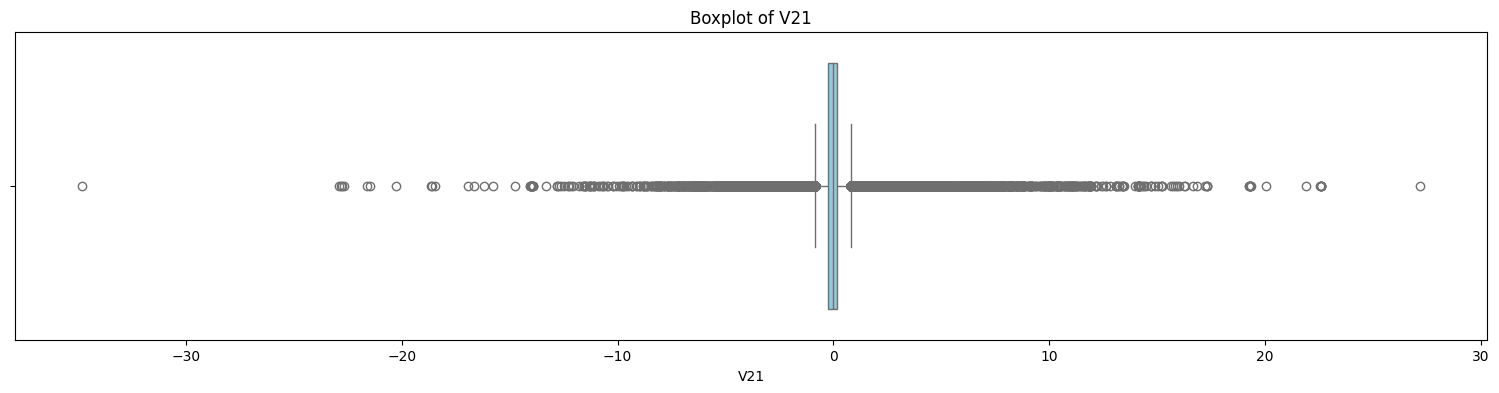

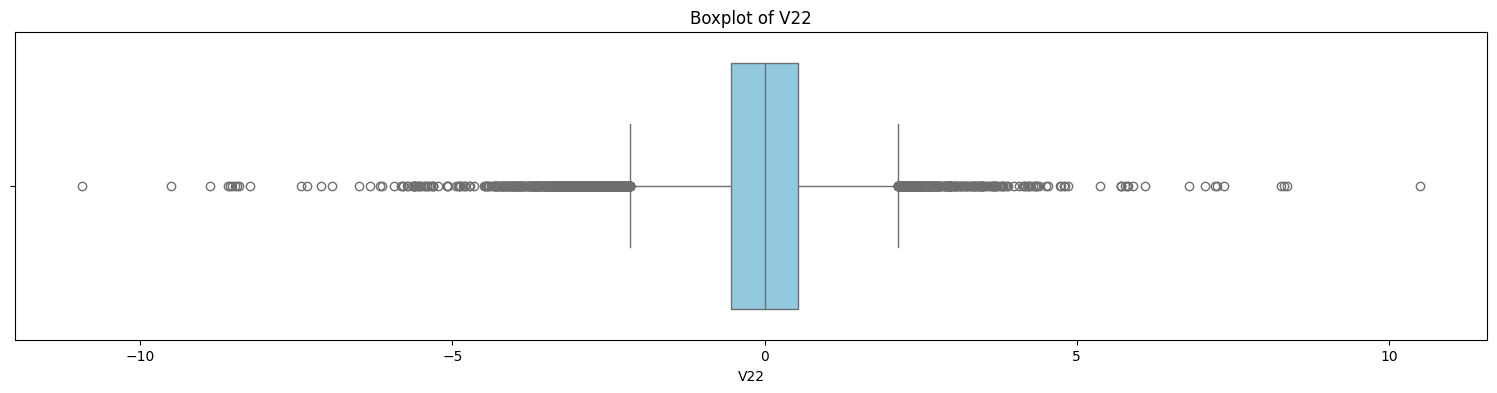

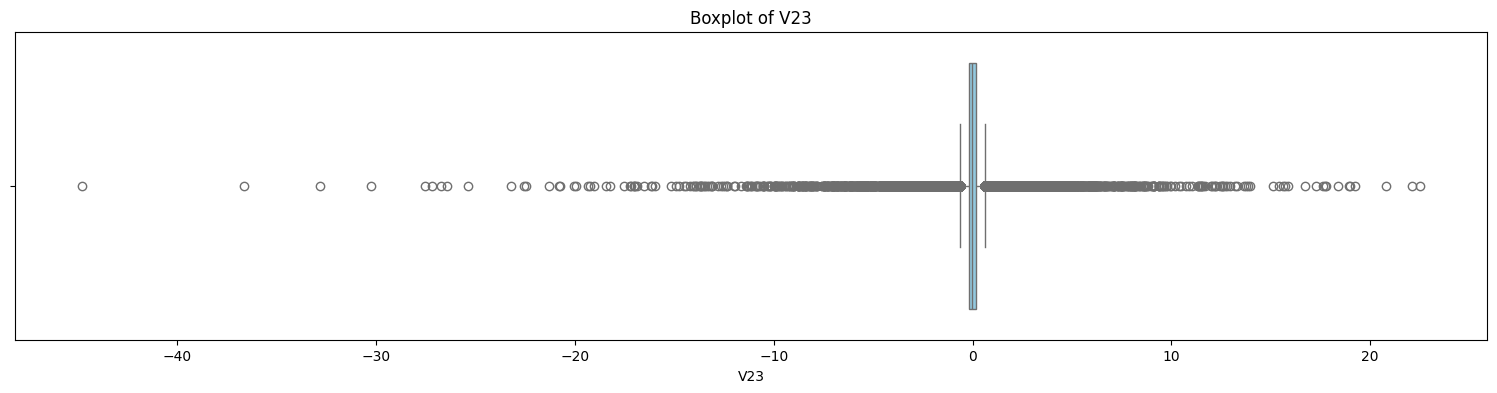

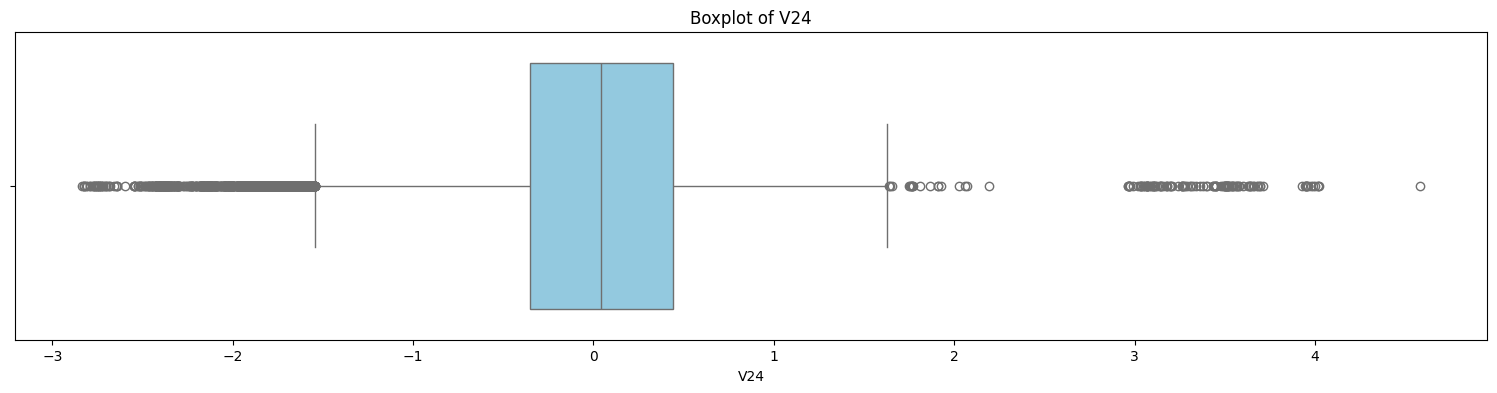

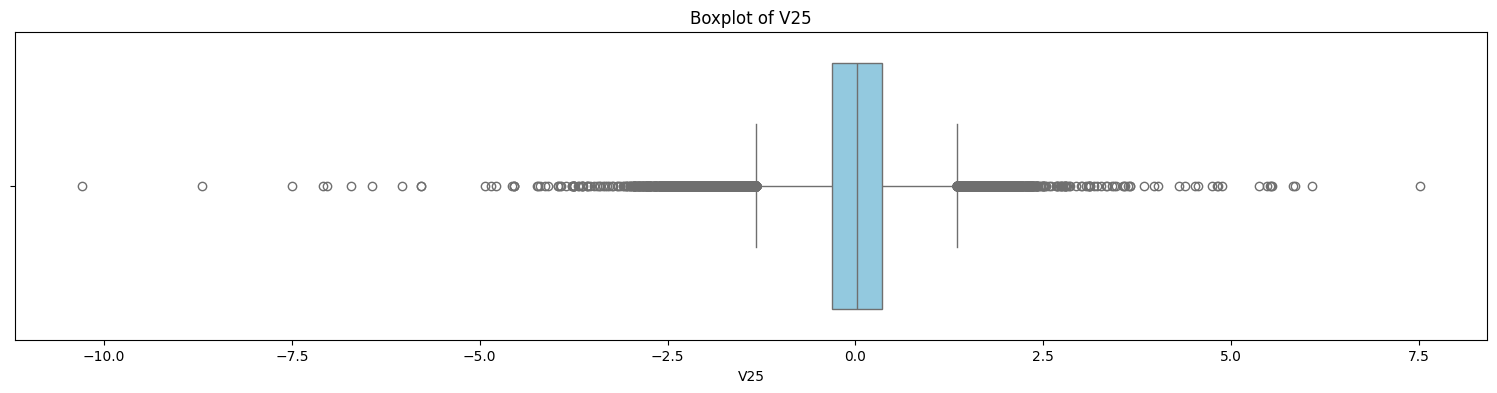

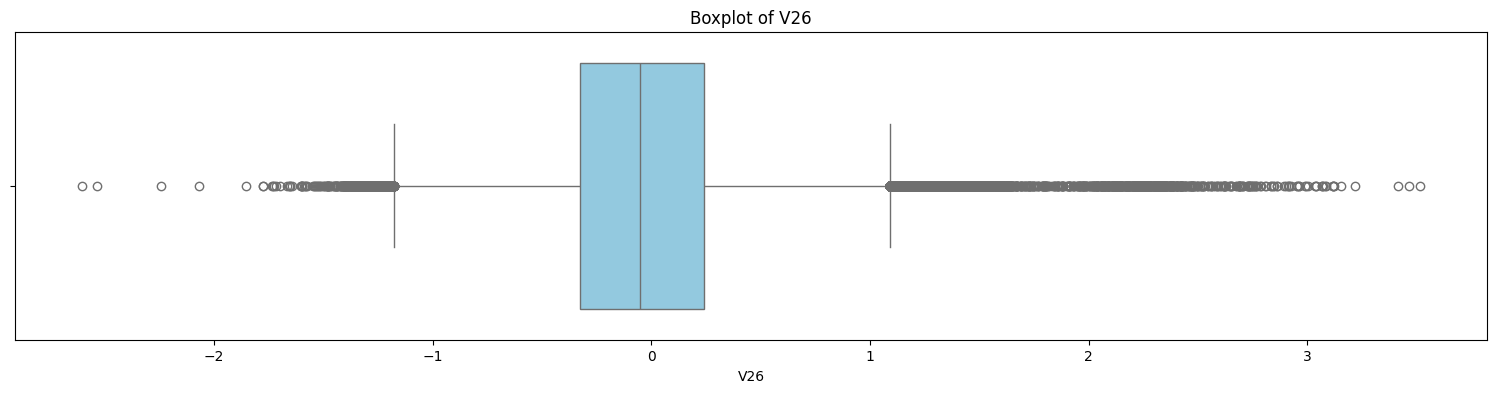

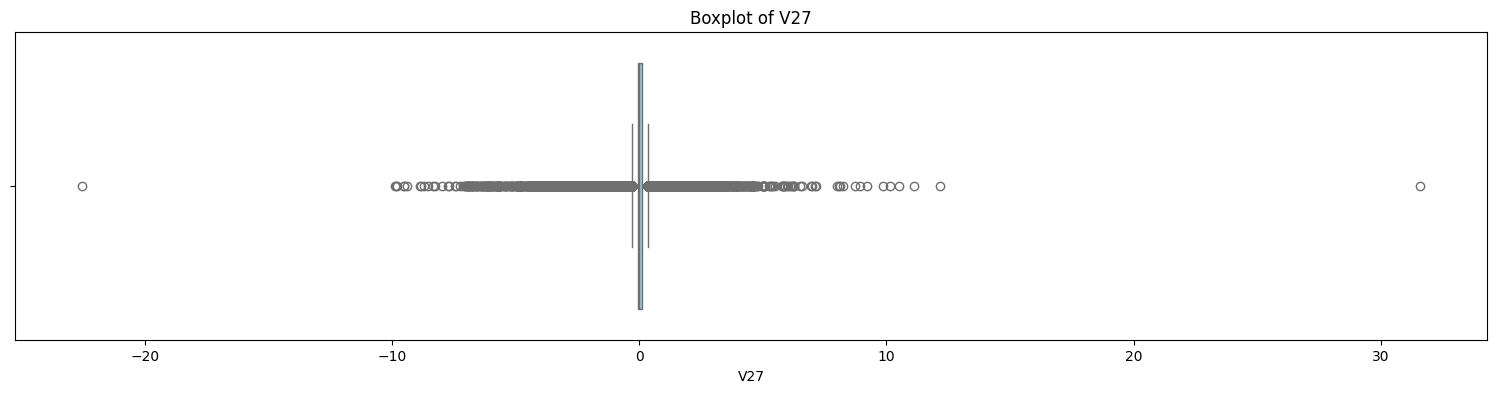

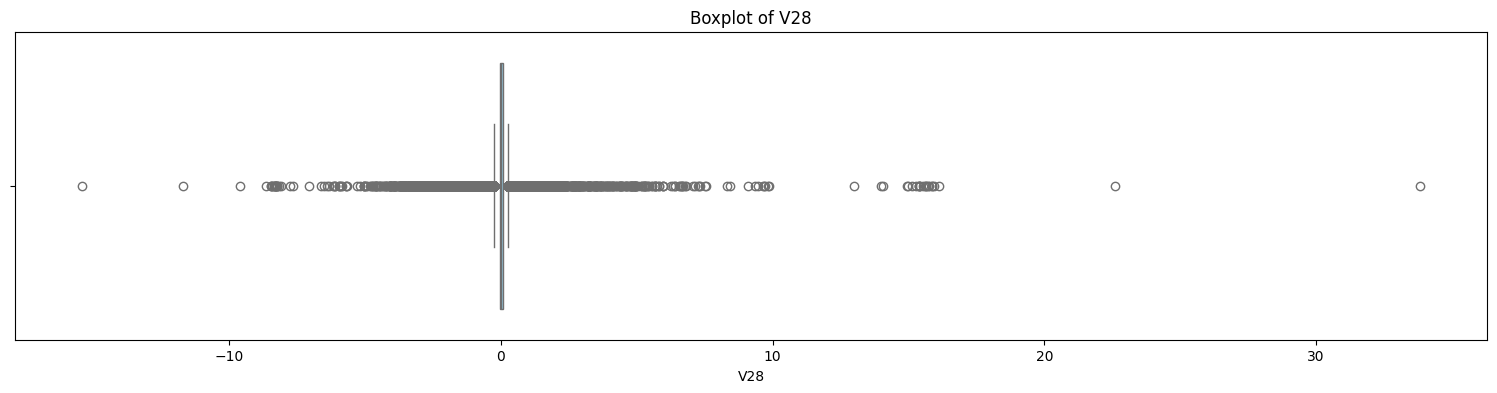

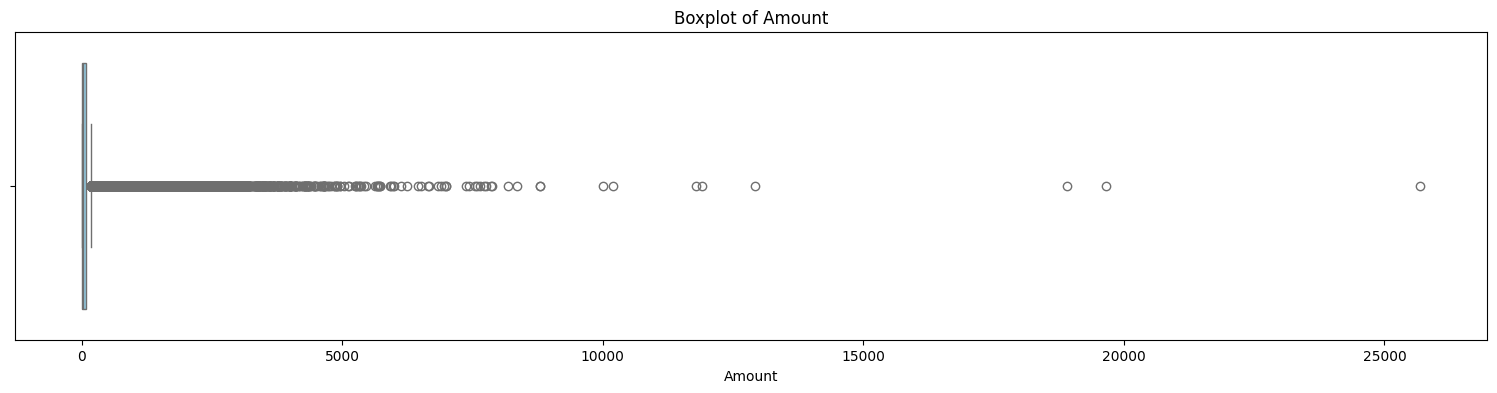

In [10]:
#create a box plot for each nummrrical columns
for feature in numerical_columns:
    plt.figure(figsize=(19, 4))
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

In [11]:
df.Class.unique()

array([0, 1])

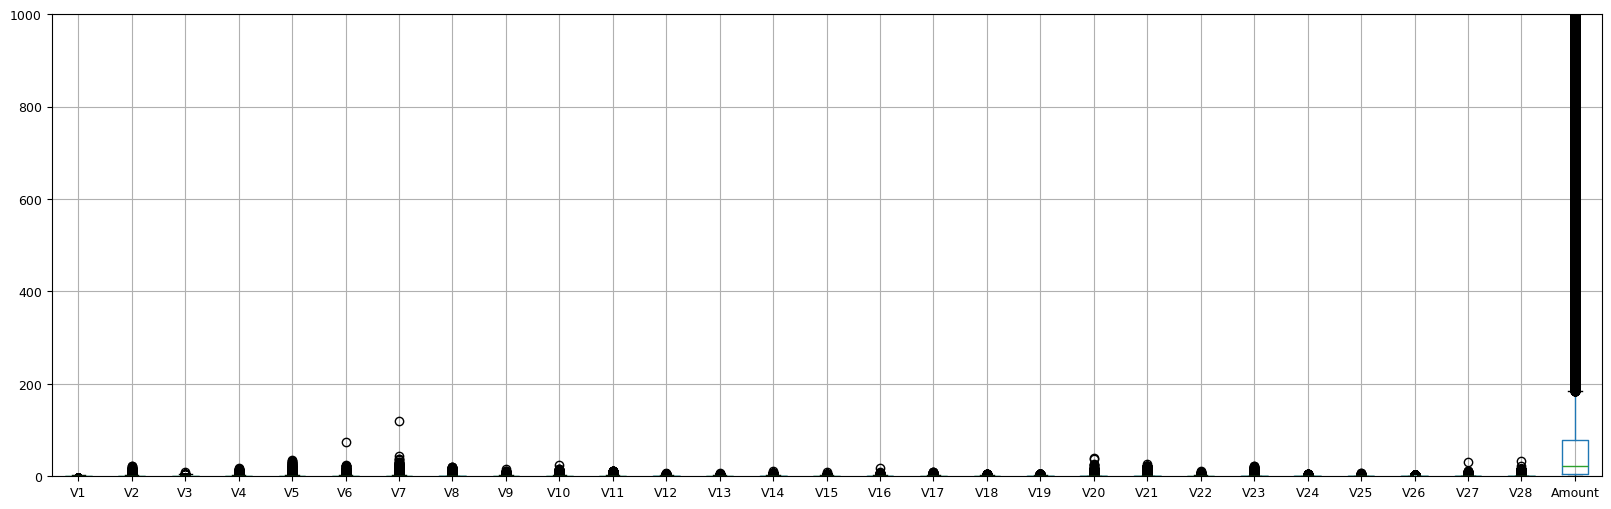

In [12]:
#create the box plot for all coulmns in one plot (the same with the previous cell)
boxplot = df.boxplot(column=numerical_columns, grid=True, fontsize=9, figsize=(20, 6))
plt.ylim(0, 1000)
plt.show()

In [13]:
df.shape

(283726, 31)

In [14]:
#calculate the median for each columns in the data
medians = []
for col in numerical_columns:
    median = df[col].median()
    medians.append(median)
medians

[0.020384054673383903,
 0.0639491720686272,
 0.1799627277579035,
 -0.0222480167048314,
 -0.05346760692155525,
 -0.2751676384634605,
 0.040859470599398345,
 0.021897947014776098,
 -0.0525956513955632,
 -0.09323652620247,
 -0.03230594037210535,
 0.13907201031481248,
 -0.012926990224900549,
 0.05020867775725035,
 0.04929885180469505,
 0.0671191378908382,
 -0.0658669329326605,
 -0.00214175617719485,
 0.0033670829391581,
 -0.062353459380288,
 -0.02944058938024295,
 0.0066748951611519,
 -0.011158576827809599,
 0.04101573318896705,
 0.01627836170044545,
 -0.0521716279959135,
 0.001478594836733,
 0.0112876044697928,
 22.0]

In [15]:
upper_bounds = []
lower_bounds = []
Q1s = []
Q3s = []
IQRs = []
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    Q1s.append(Q1)
    Q3s.append(Q3)
    IQRs.append(IQR)
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    lower_bounds.append(lower)
    upper_bounds.append(upper)
lower_bounds

[-4.263979957375013,
 -2.7012257535647324,
 -3.7646449731967664,
 -3.2348066128229642,
 -2.6429012689627394,
 -2.517765132942298,
 -2.236984407382578,
 -1.0106267049372626,
 -2.504517212462476,
 -2.019373365934702,
 -3.013492029375163,
 -1.940959067195664,
 -2.6144226683861955,
 -1.802834475317419,
 -2.428785787237029,
 -1.952416410433839,
 -1.8082765194756663,
 -1.997969244031534,
 -1.8284841911416798,
 -0.7284838654918867,
 -0.8500526757143614,
 -2.1491170627897875,
 -0.6258812915555879,
 -1.5457413287661317,
 -1.3197144770106826,
 -1.1773004551337805,
 -0.3134143028572532,
 -0.2494592299657585,
 -102.26500000000001]

In [16]:
Q3s

[1.31606775368132,
 0.8002828928387605,
 1.0269599742860676,
 0.739646964483283,
 0.6122179627567953,
 0.39679214047379624,
 0.5704738684867068,
 0.3257036839267247,
 0.5959768591827228,
 0.4536187284492523,
 0.7395791921050707,
 0.6169764893919558,
 0.6631783137505225,
 0.492335540901136,
 0.6501041163940502,
 0.5235115807729338,
 0.3989717123472575,
 0.5019556651381313,
 0.4585079337186285,
 0.133207117892697,
 0.18619360292644677,
 0.5282451977216824,
 0.147748443326184,
 0.43973848484478795,
 0.3506673662397138,
 0.2402613022919345,
 0.09120816464559875,
 0.0782760938807502,
 77.51]

In [17]:
IQRs

[2.232019084422533,
 1.4006034585613971,
 1.9166419789931337,
 1.589781430922499,
 1.3020476926878137,
 1.1658229093664376,
 1.122983310347714,
 0.534532155545595,
 1.2401976286580796,
 0.9891968377535818,
 1.5012284885920937,
 1.023174222635048,
 1.3110403928546872,
 0.918068006487422,
 1.2315559614524316,
 0.9903711964827091,
 0.8828992927291694,
 0.9999699636678661,
 0.9147968499441232,
 0.3446763933538335,
 0.41449851145632327,
 1.070944904204588,
 0.3094518939527088,
 0.7941919254443679,
 0.6681527373001586,
 0.567024702970286,
 0.16184898700114078,
 0.13109412953860347,
 71.91000000000001]

In [18]:
upper_bounds

[4.66409638031512,
 2.901188080680856,
 3.901922942775768,
 3.1243191108670314,
 2.565289501788516,
 2.1455265045234526,
 2.2549488340082777,
 1.127501917245117,
 2.4562733021698424,
 1.937413985079625,
 2.991421924993211,
 2.1517378233445275,
 2.6297389030325533,
 1.8694375506322691,
 2.4974380585726976,
 2.0090683754969976,
 1.7233206514410115,
 2.0019106106399303,
 1.8307032086348136,
 0.6502217079234472,
 0.8079413701109317,
 2.1346625540285644,
 0.6119262842552472,
 1.63102637301134,
 1.3528964721899515,
 1.0907983567473634,
 0.3339816451473099,
 0.2749172881886554,
 185.375]

In [19]:
#make a new data without "time","class" columns
new_df = df.drop(columns=['Time', 'Class'])

In [20]:
new_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,...,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687
std,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,...,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,...,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000
50%,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,...,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000
75%,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,...,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


In [21]:
new_df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [22]:
type(lower_bounds)

list

In [ ]:
# #in each columns make the values which grater than or smaller than lowwer,upper be the median of col
# for i in range(len(numerical_columns)):
#     col = numerical_columns[i]
#     low_value = lower_bounds[i]
#     upper_value = upper_bounds[i]
#     median_value = medians[i]
#     new_df.loc[(new_df[col] < low_value), col] = median_value
#     new_df.loc[(new_df[col] > upper_value), col] = median_value

In [23]:
#add the column time in the begaing of the data again
new_df.insert(0, 'Time', df['Time'])

In [24]:
new_df.Time.min()

0.0

In [25]:
new_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [26]:
#add the column class to the data
new_df.insert(30, 'Class', df['Class'])

In [27]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [28]:

new_df['Class'].unique()

array([0, 1])

In [29]:
new_df.Time.min()

0.0

In [30]:
new_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


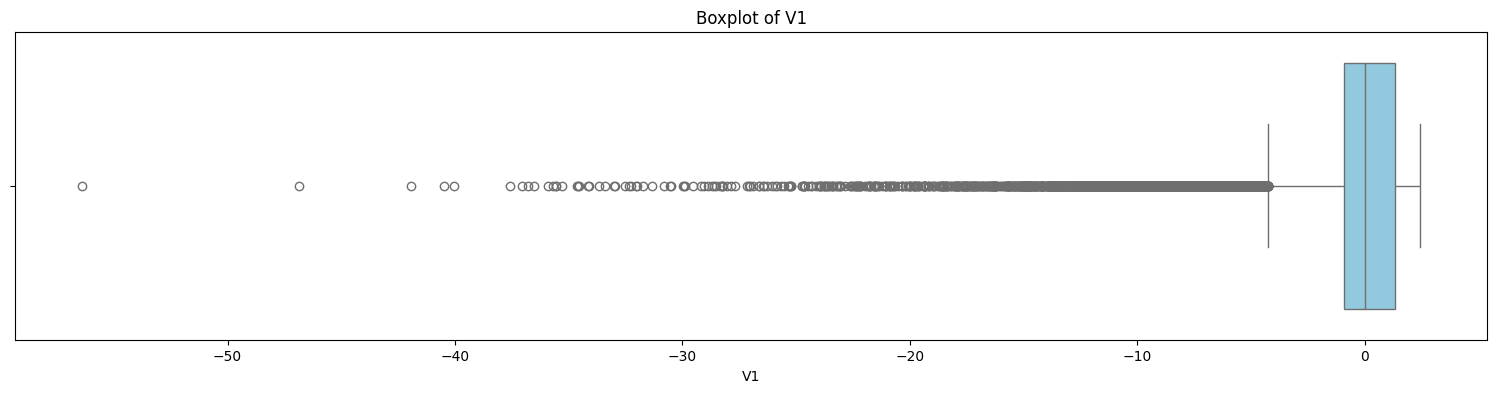

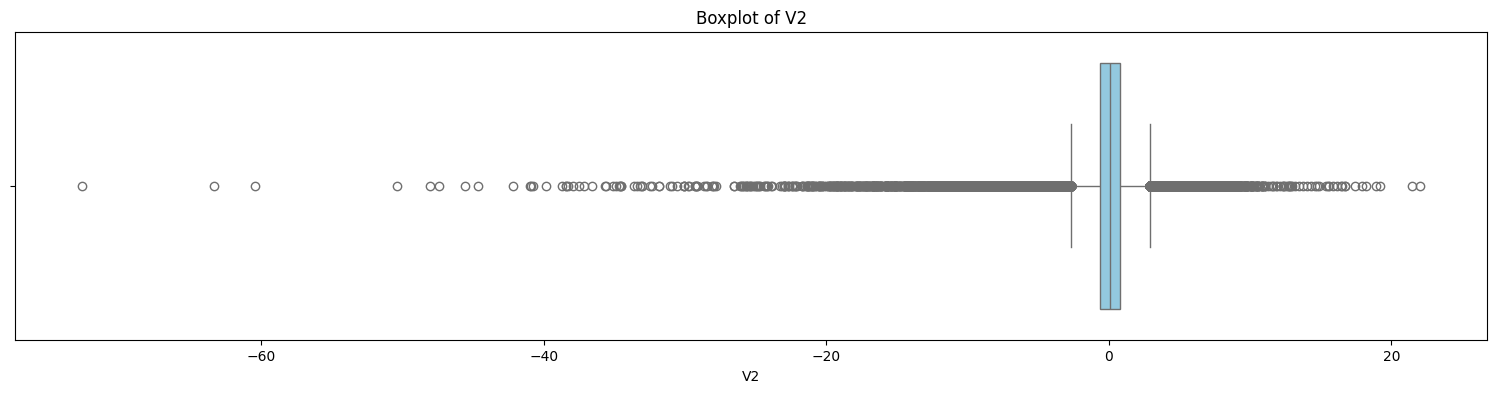

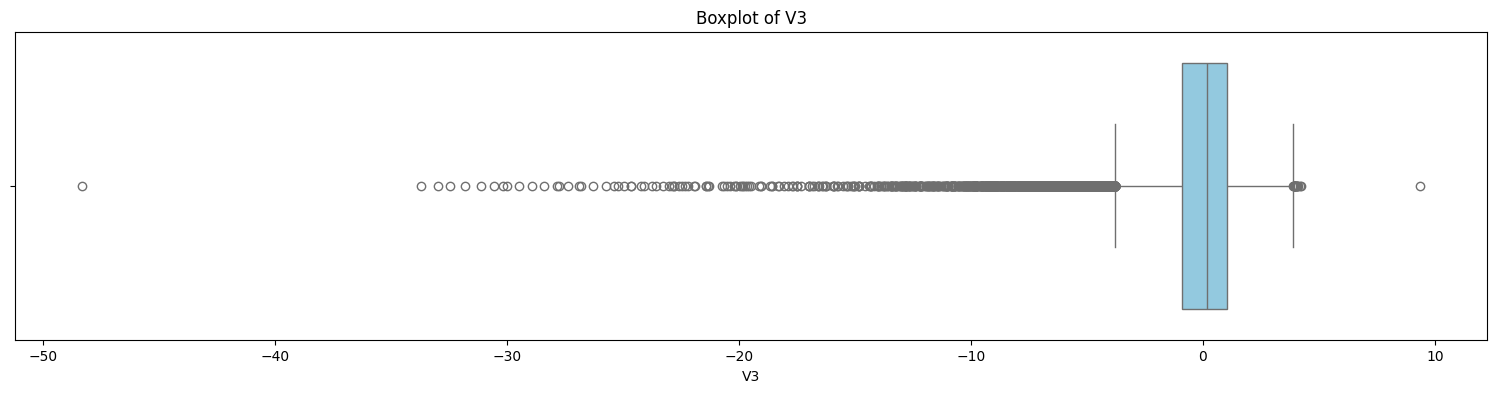

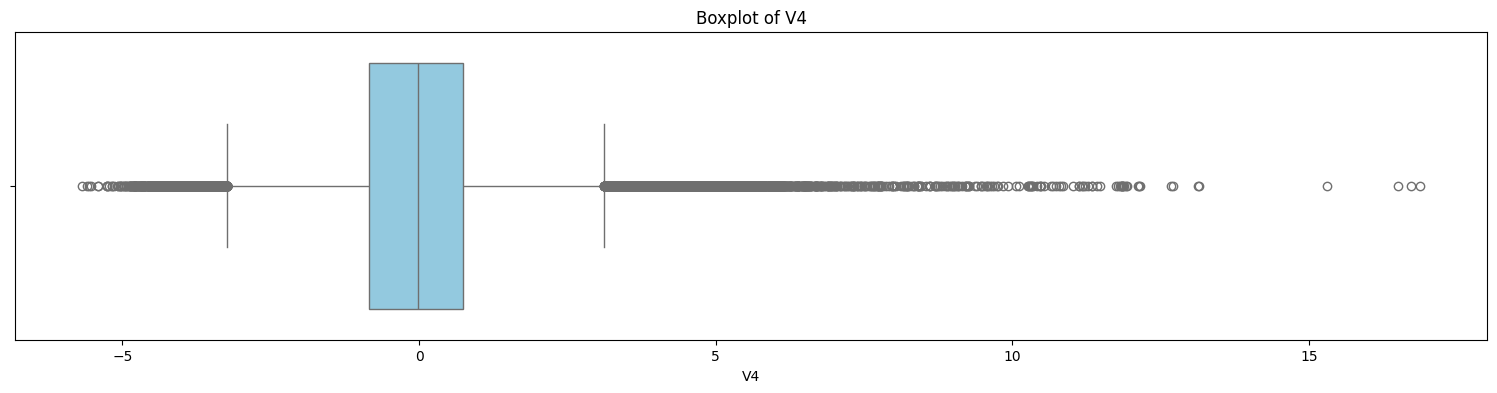

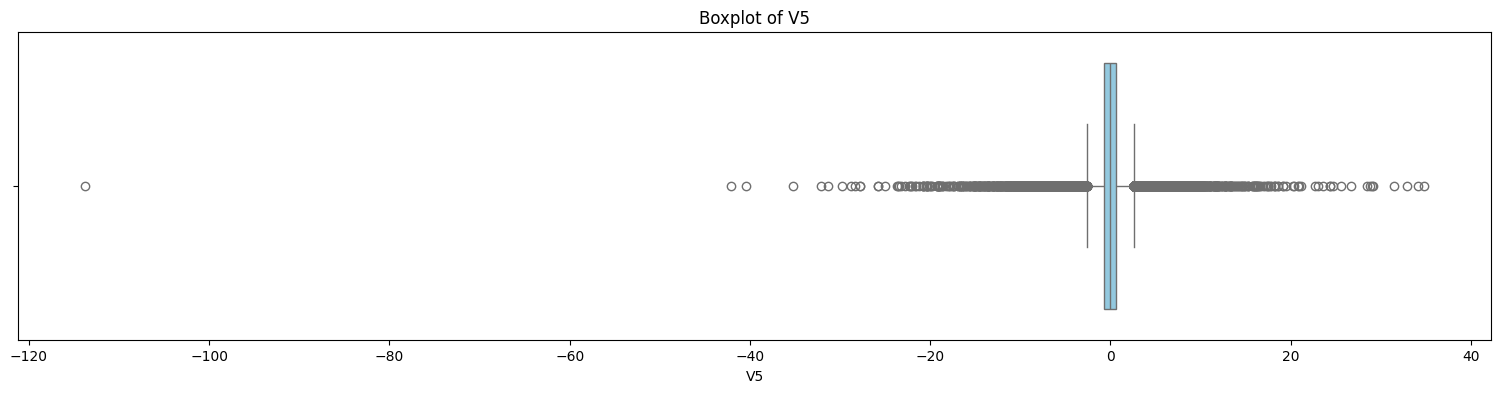

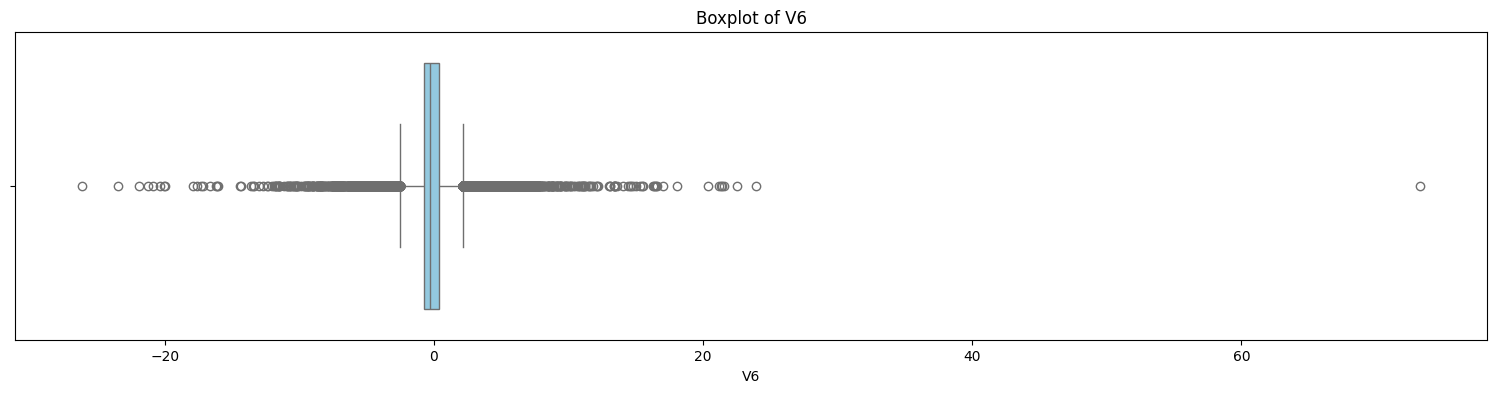

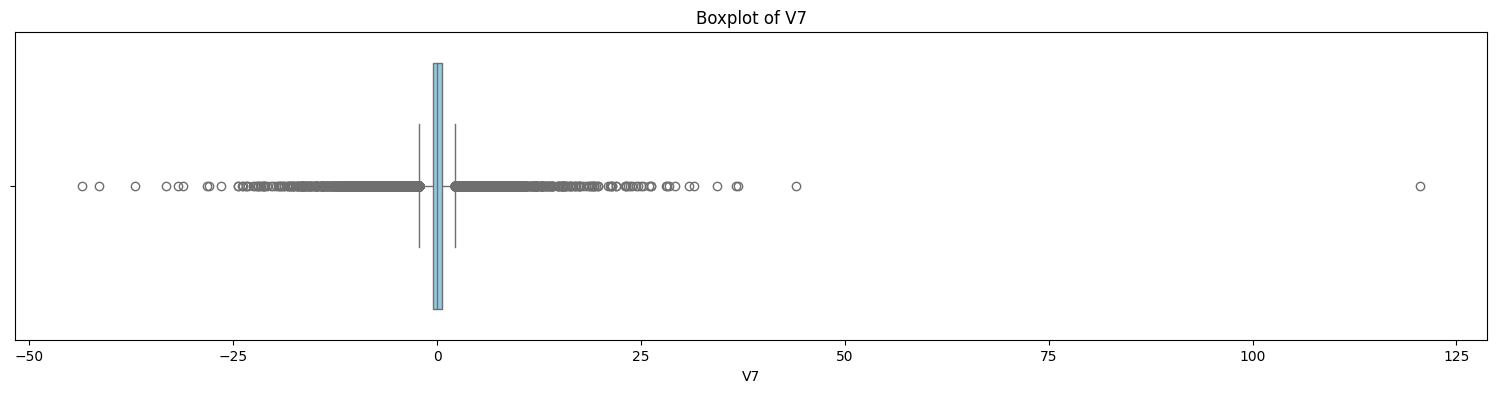

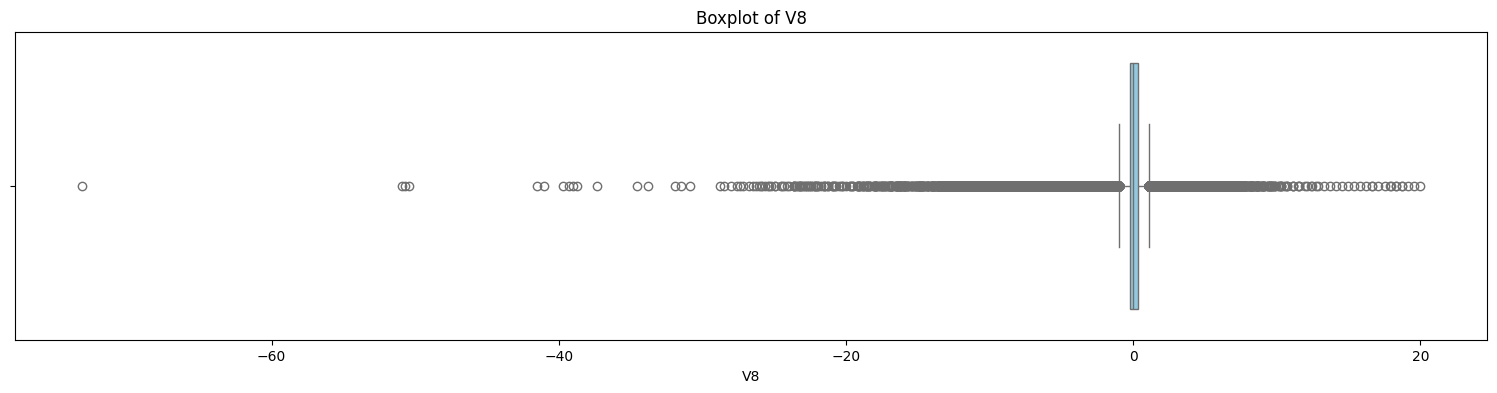

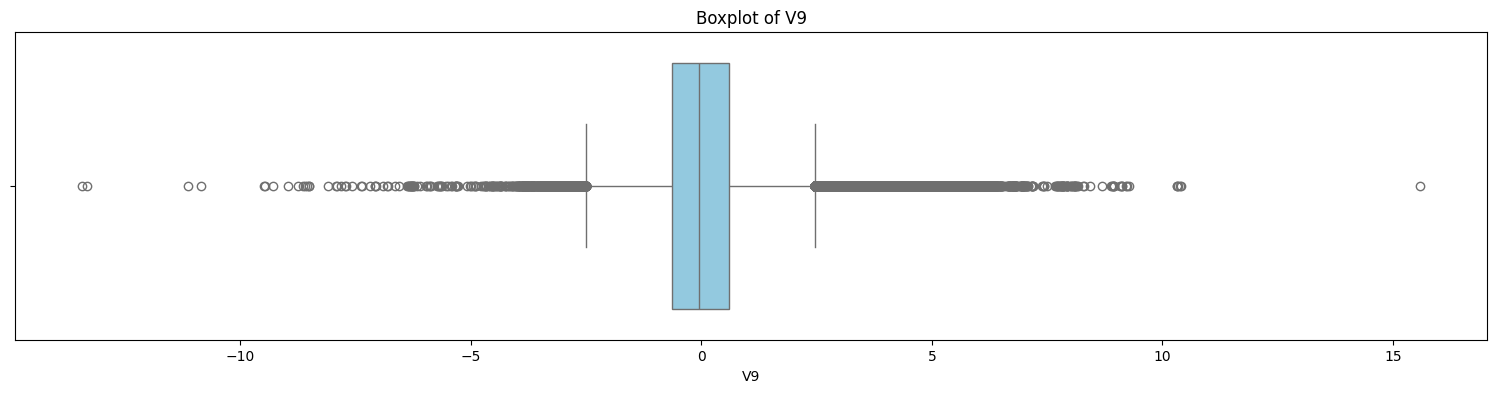

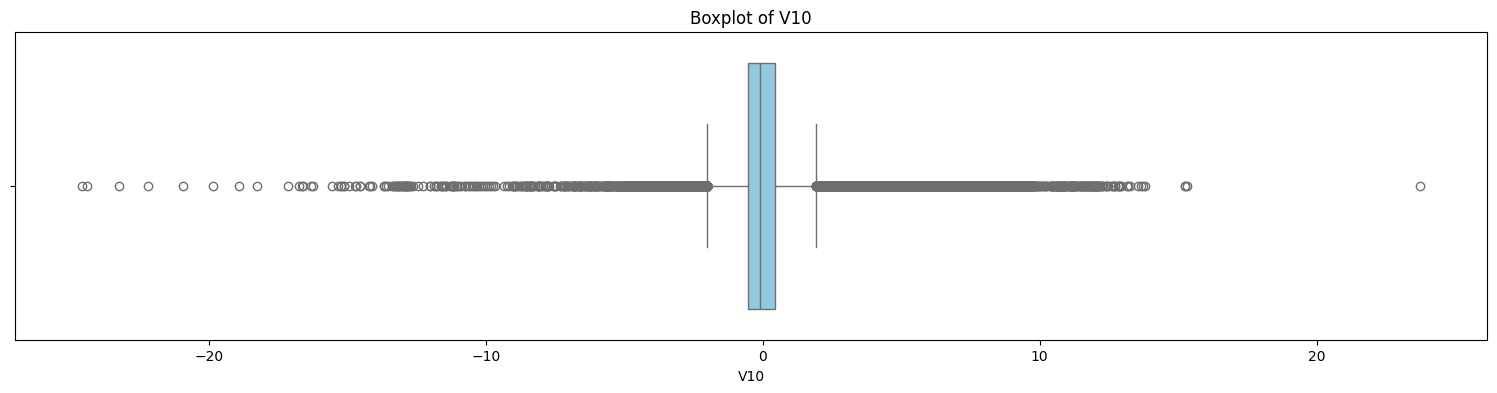

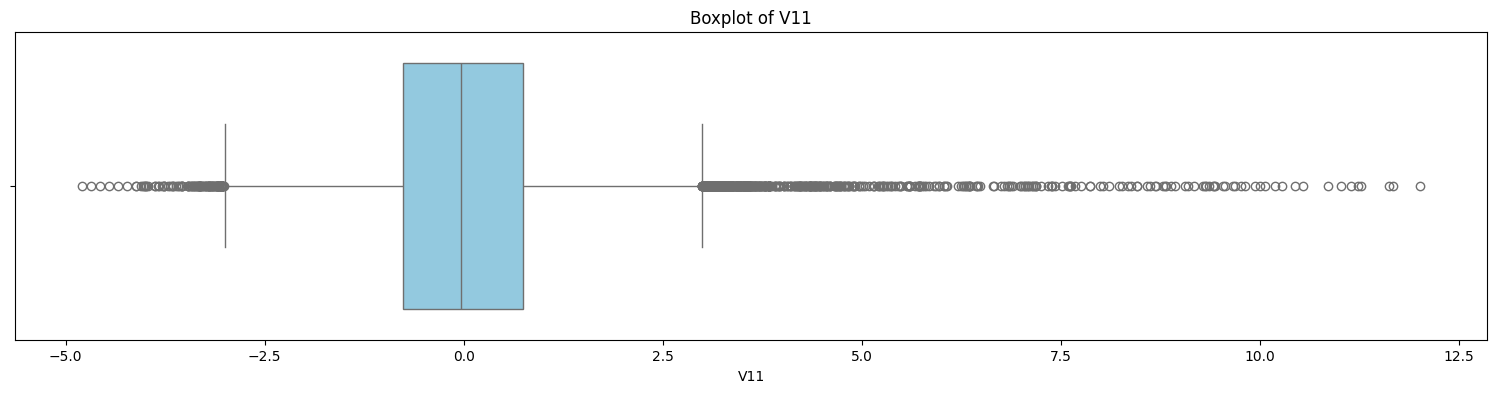

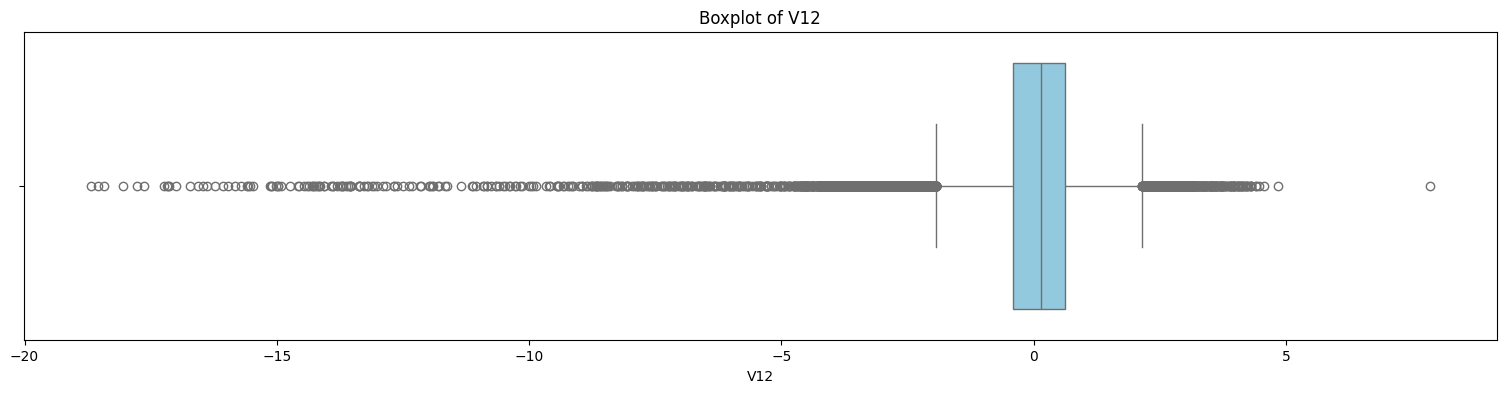

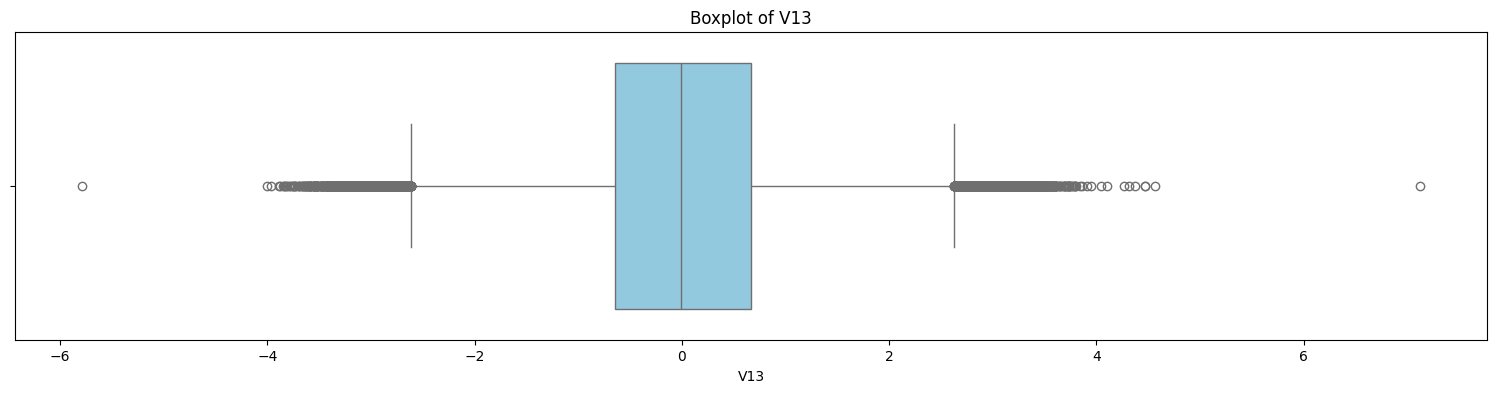

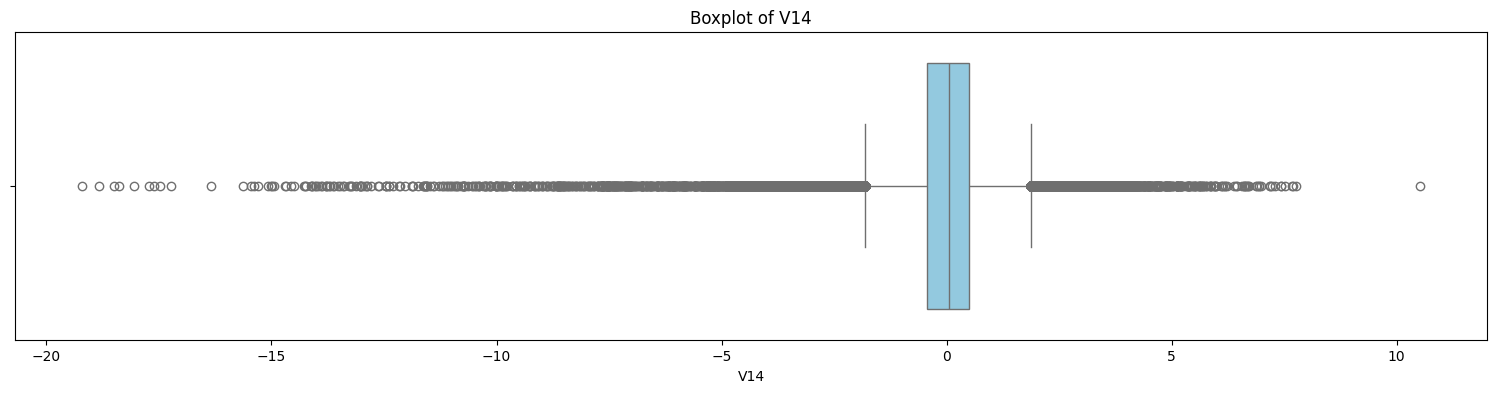

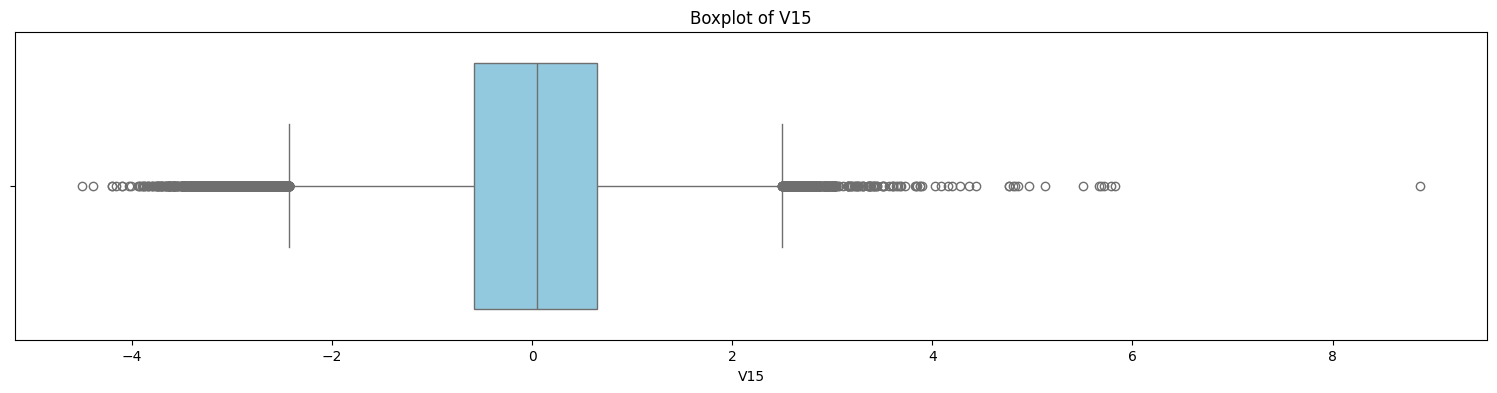

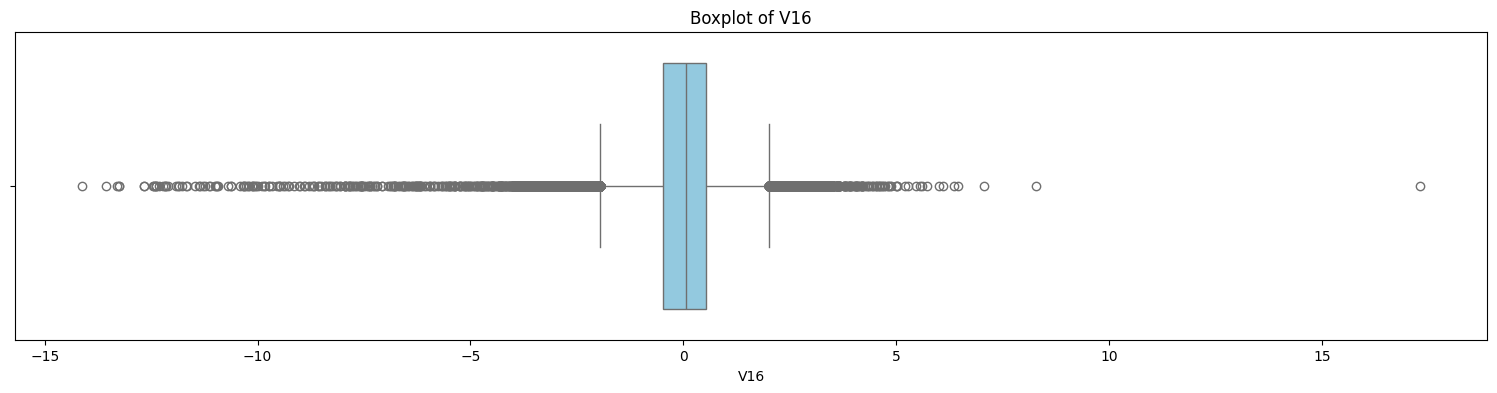

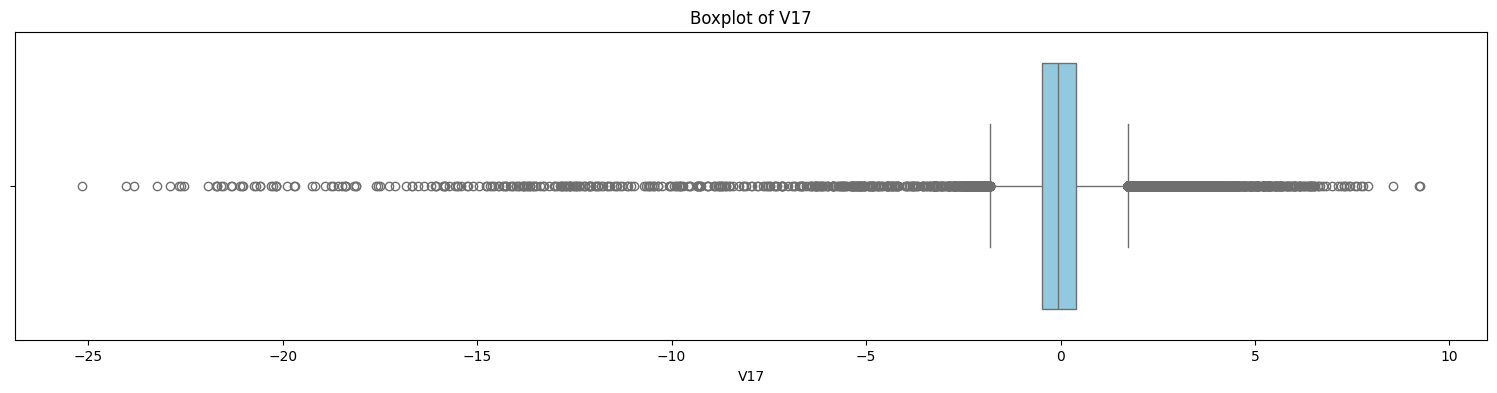

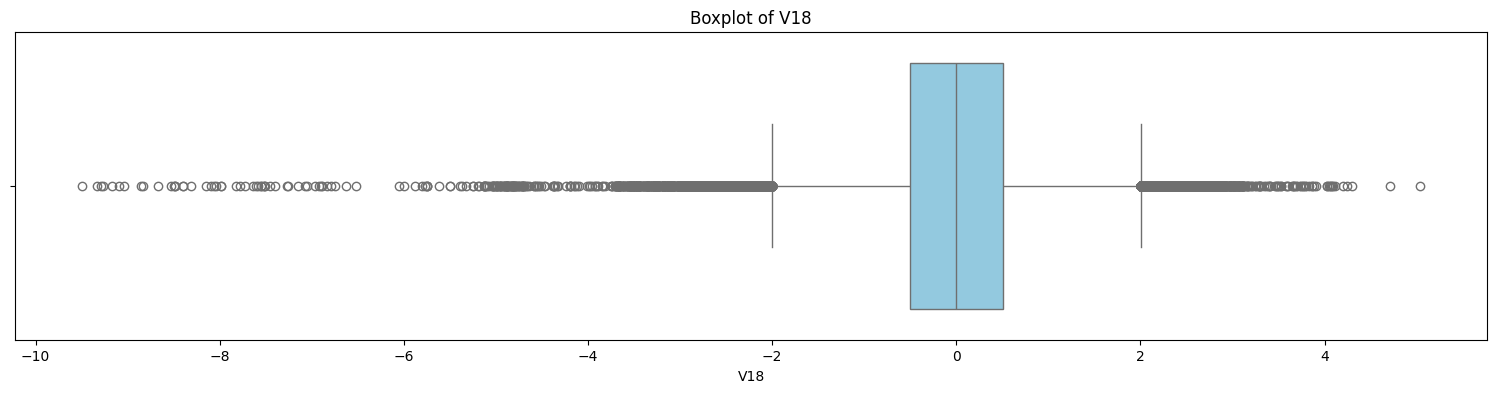

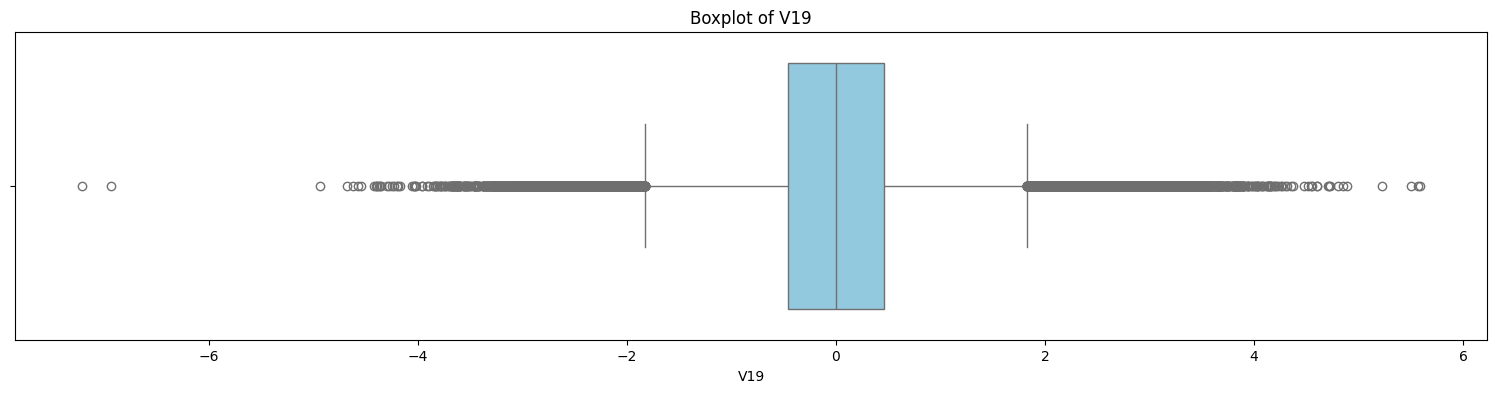

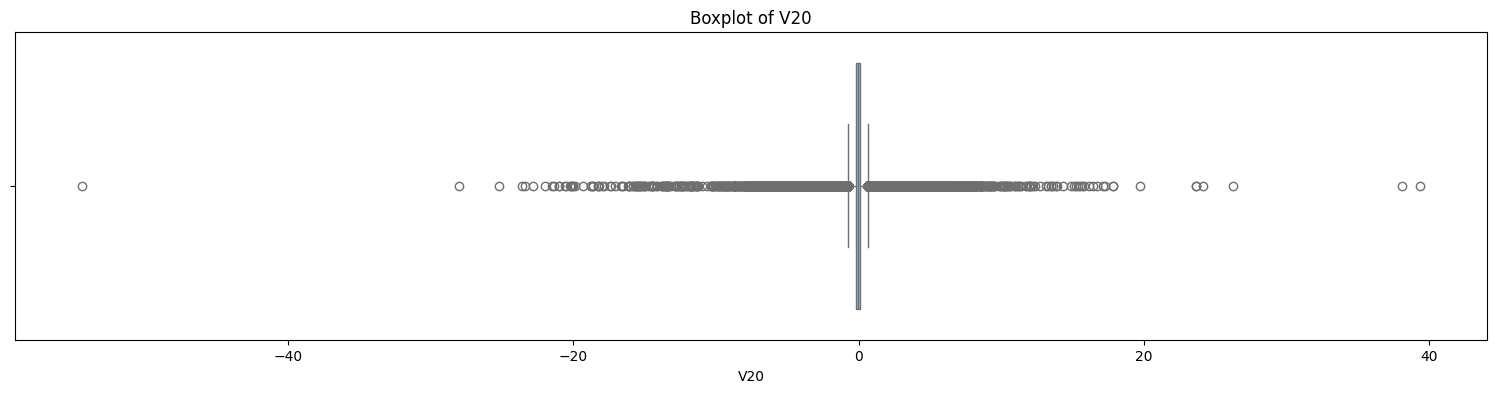

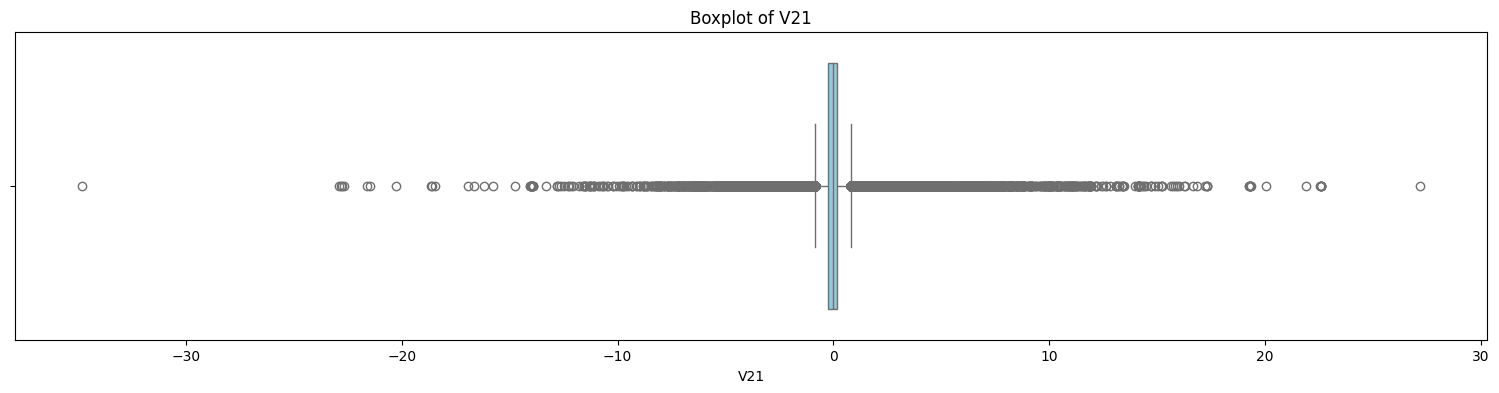

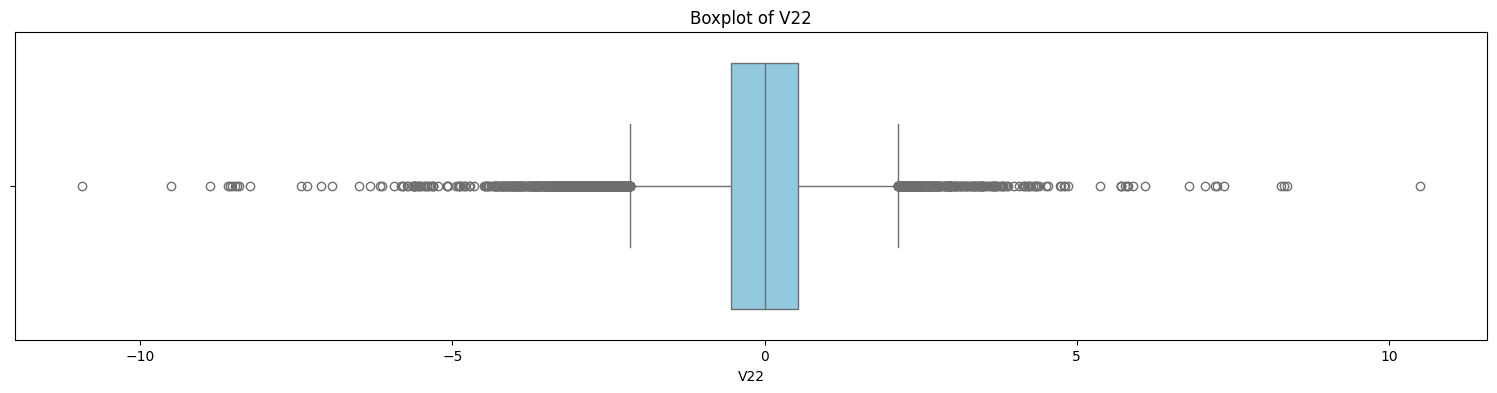

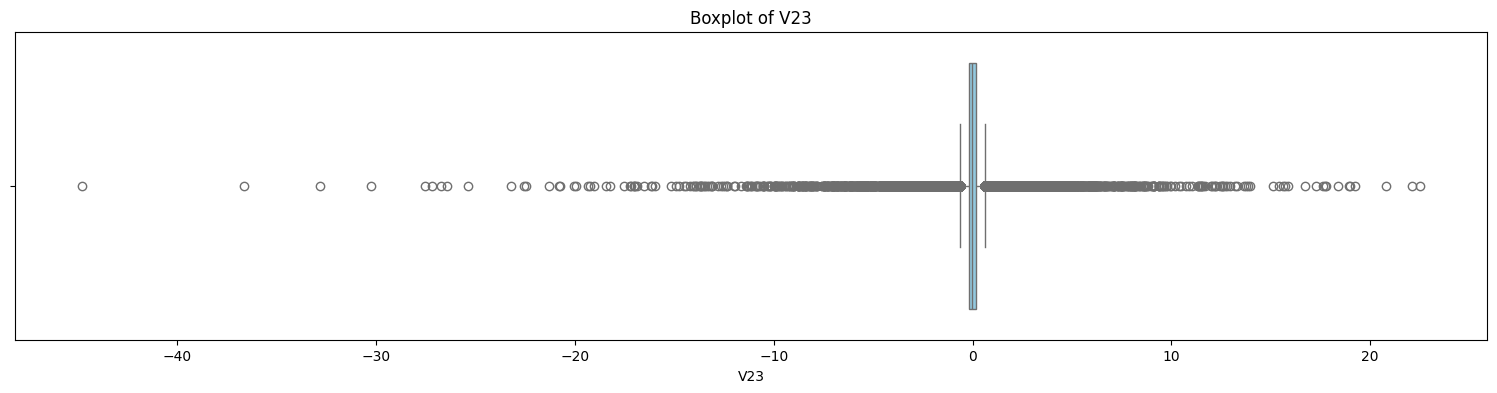

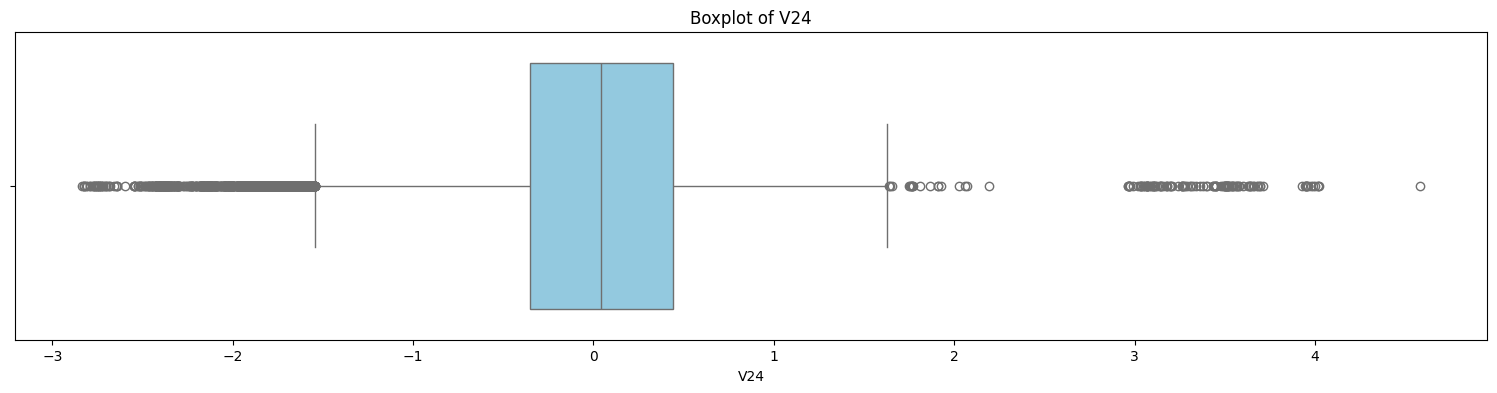

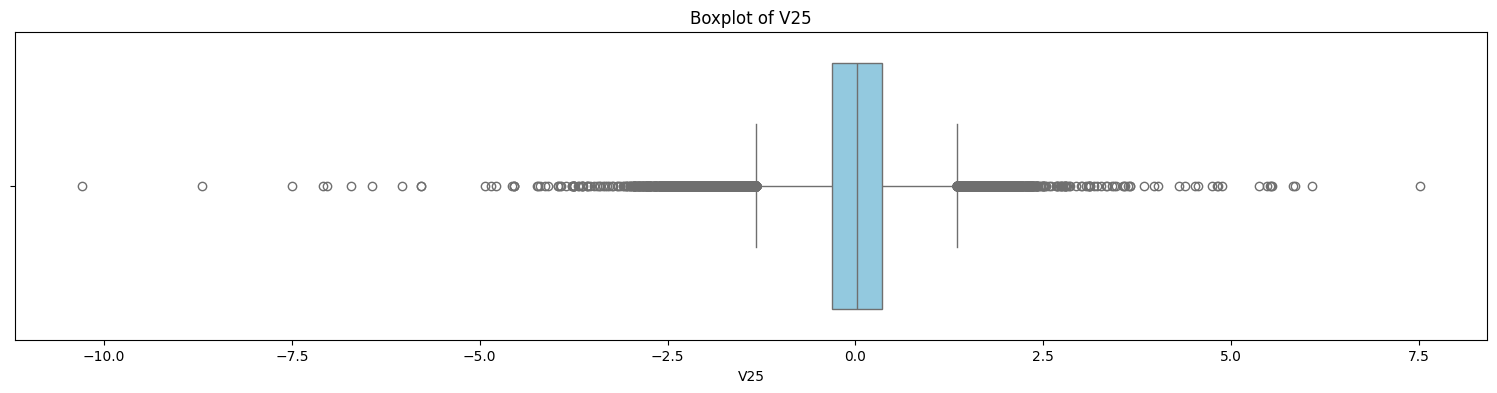

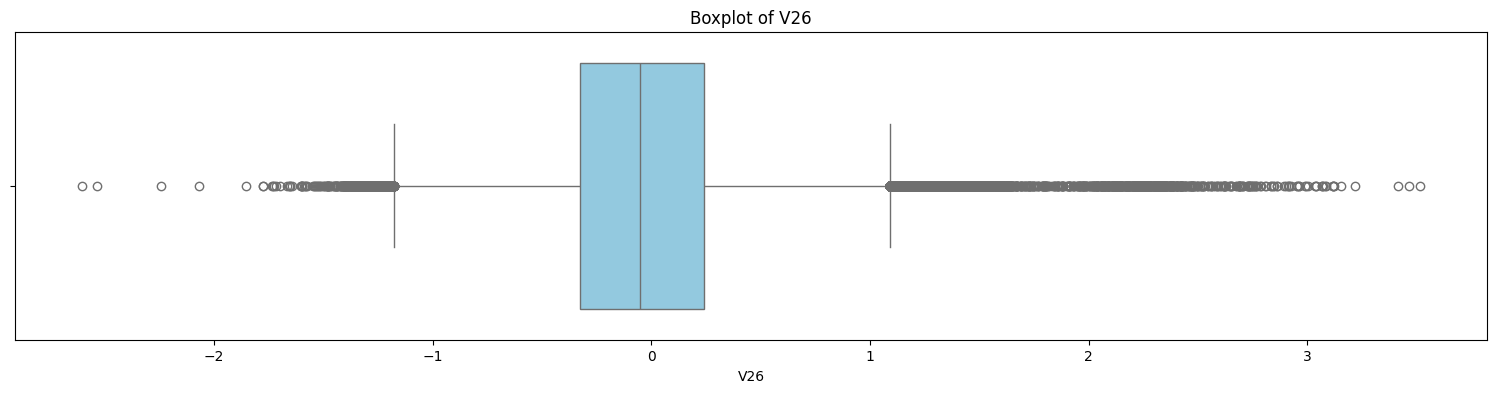

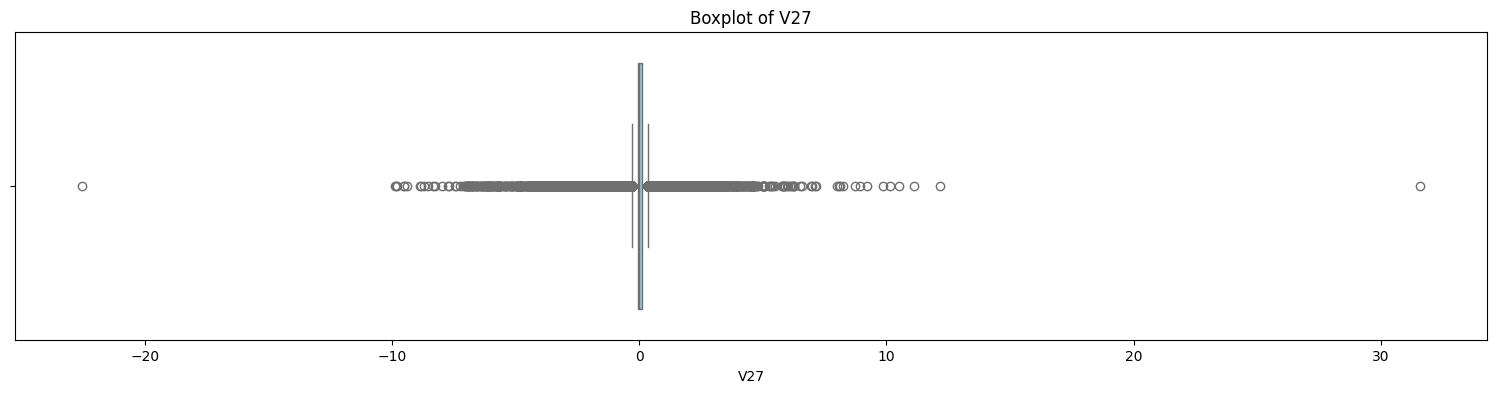

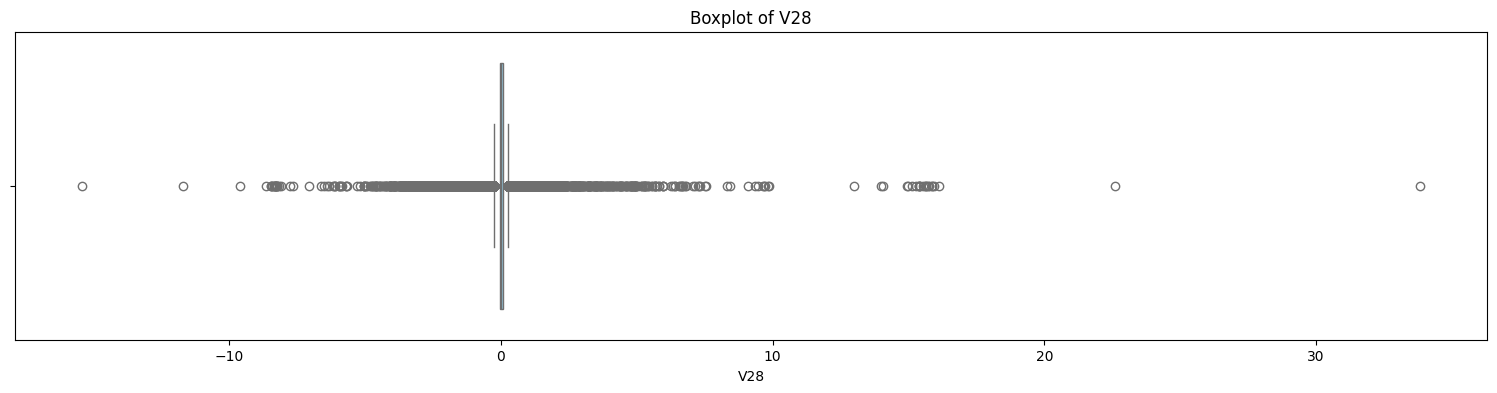

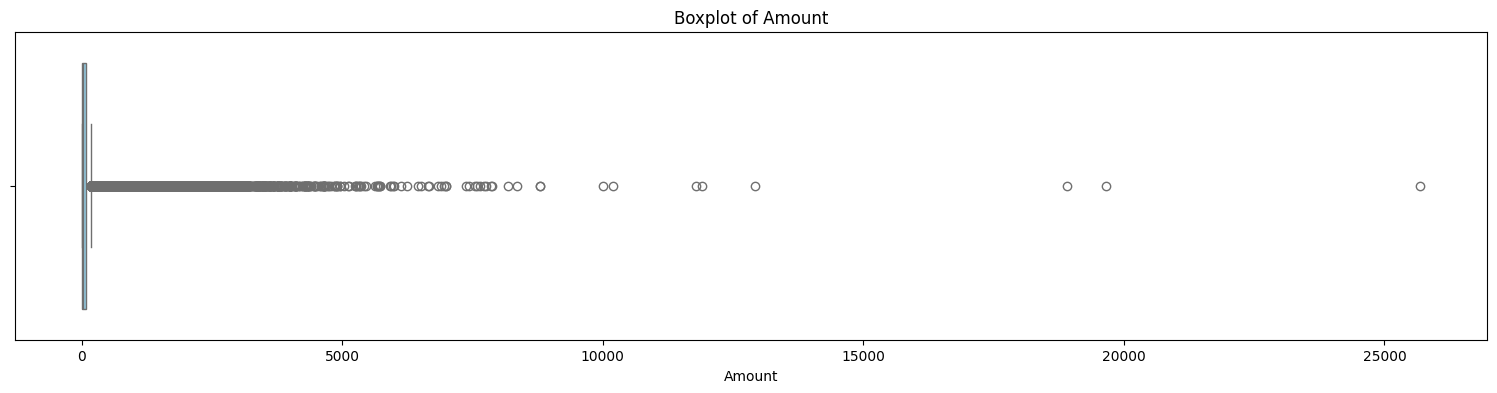

In [31]:
#plot the data after remove outliers
for feature in numerical_columns:
    plt.figure(figsize=(19, 4))
    sns.boxplot(x=new_df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

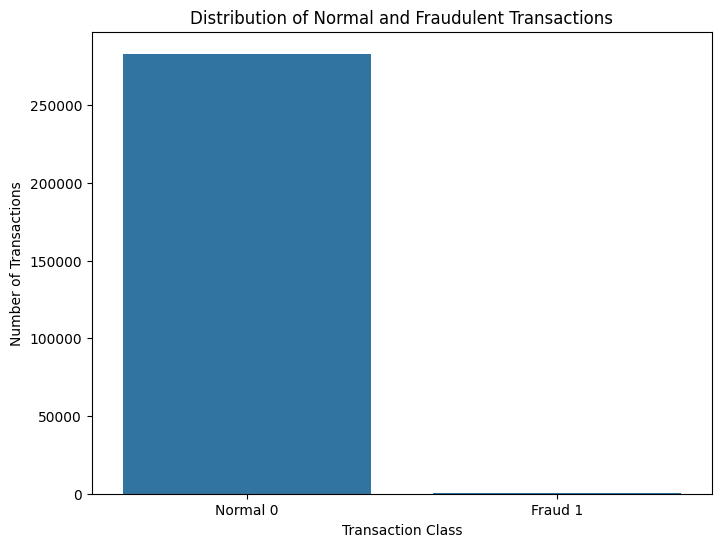

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=new_df)
plt.xticks([0, 1], ['Normal 0', 'Fraud 1'])
plt.xlabel('Transaction Class')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Normal and Fraudulent Transactions')
plt.show()

In [33]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [34]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [35]:
y.unique()

array([0, 1])

In [36]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [37]:
# Make oversampling on the data
oversample = SMOTE(random_state=42)
X_over_sampled, y_over_sampled = oversample.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [38]:
#concat the x,y in one date : resampled
reasmpled_data=pd.concat([X_over_sampled,y_over_sampled], axis=1)
reasmpled_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566501,41183.445750,-7.151786,5.337862,-10.524210,6.638176,-7.107253,-3.688276,-11.629728,4.641323,-6.040679,...,2.101089,-0.223411,0.029599,0.393875,-0.049155,0.544700,1.306198,0.223600,17.434148,1
566502,14264.057012,-4.705909,8.250299,-14.559164,9.787990,-4.117161,-3.169121,-10.169571,4.500750,-5.177936,...,1.988732,0.194092,0.480124,-1.079562,-0.444215,0.557467,1.234855,0.627900,1.699263,1
566503,135064.971368,0.407366,1.352354,-4.892782,3.554728,-1.282114,-1.271505,-0.977517,0.462476,-1.442286,...,0.765180,0.703300,0.814076,0.814930,-0.300969,0.168339,0.236775,0.037244,282.964802,1
566504,109361.849259,0.580032,2.773047,-5.790024,5.606953,0.398480,-0.621865,-2.954884,0.837074,-1.822486,...,0.311488,-0.810361,-0.067584,-0.632356,0.414552,0.073243,0.736440,0.358067,4.145185,1


In [39]:
reasmpled_data.Class.unique()

array([0, 1])

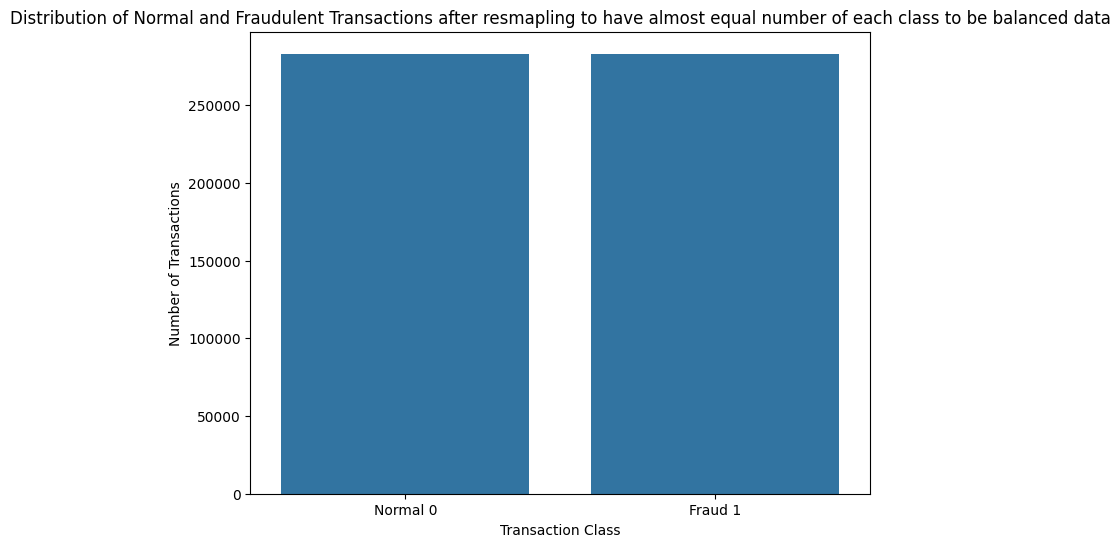

In [40]:
#plot after under sampling
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=reasmpled_data)
plt.xticks([0, 1], ['Normal 0', 'Fraud 1'])
plt.xlabel('Transaction Class')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Normal and Fraudulent Transactions after resmapling to have almost equal number of each class to be balanced data')
plt.show()

In [41]:
reasmpled_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

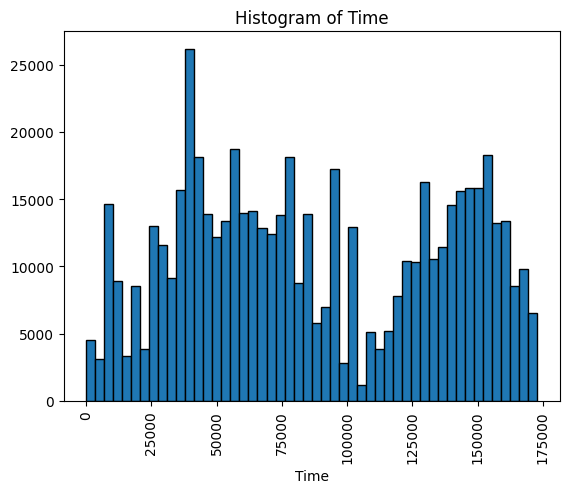

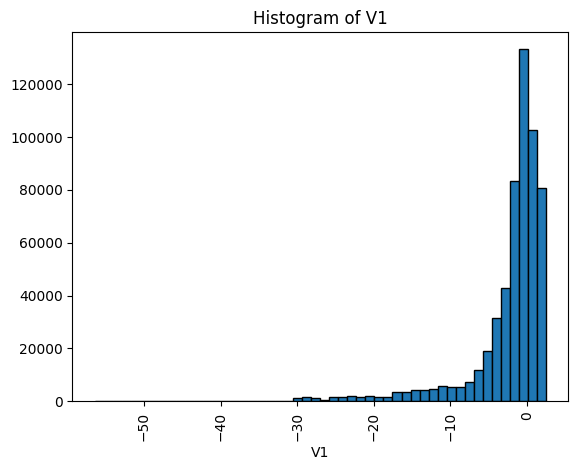

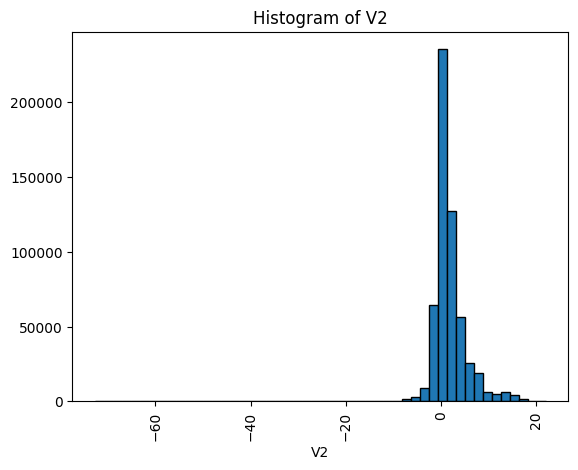

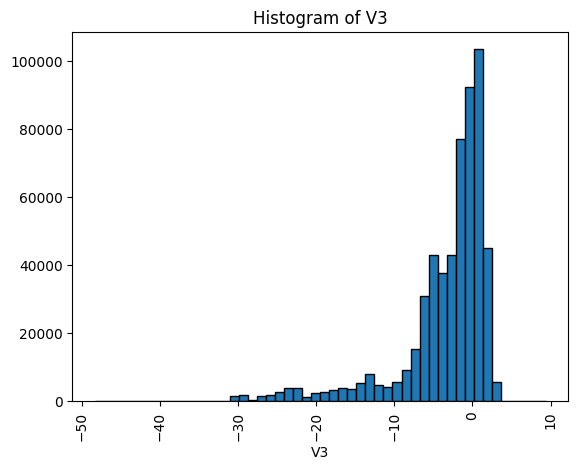

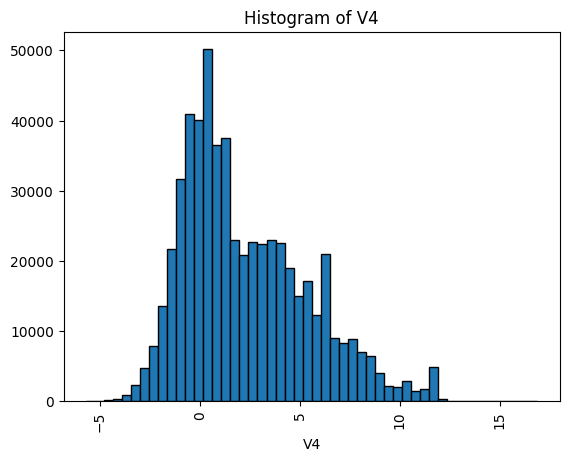

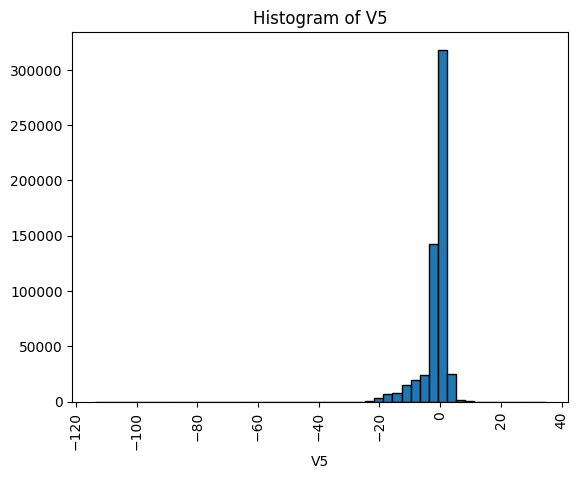

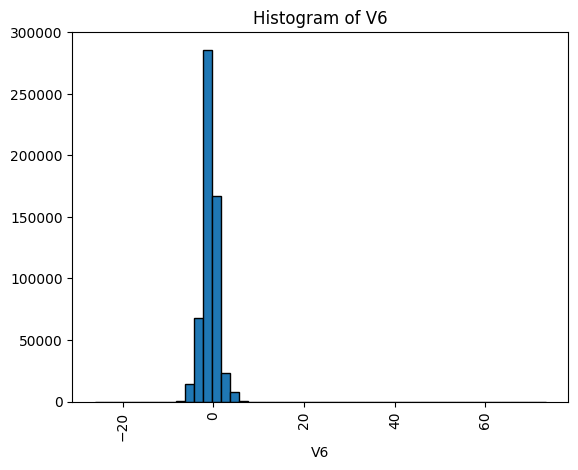

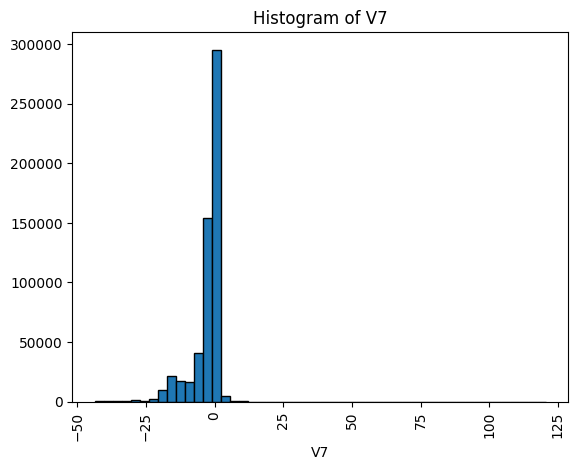

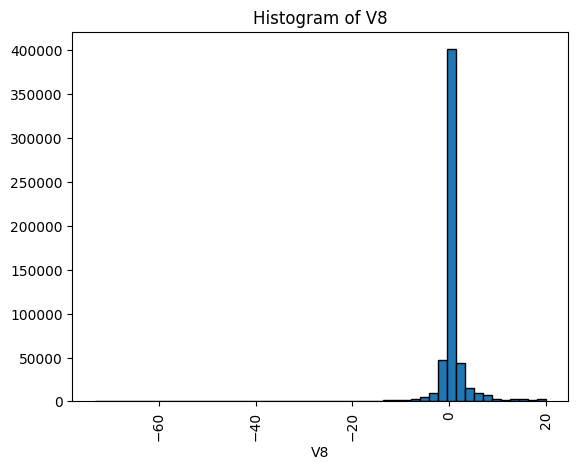

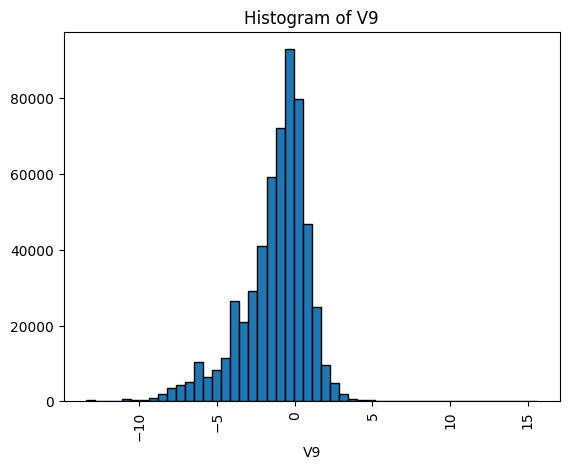

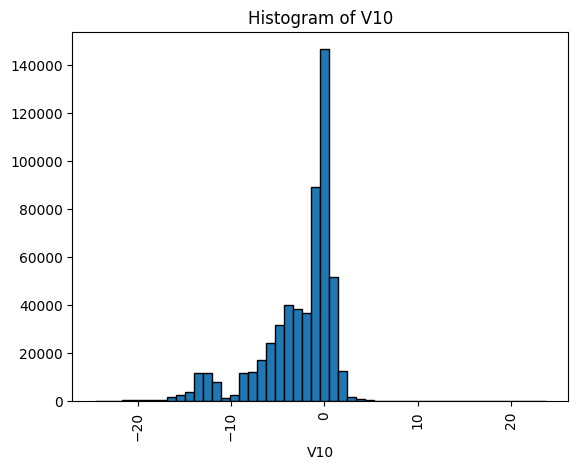

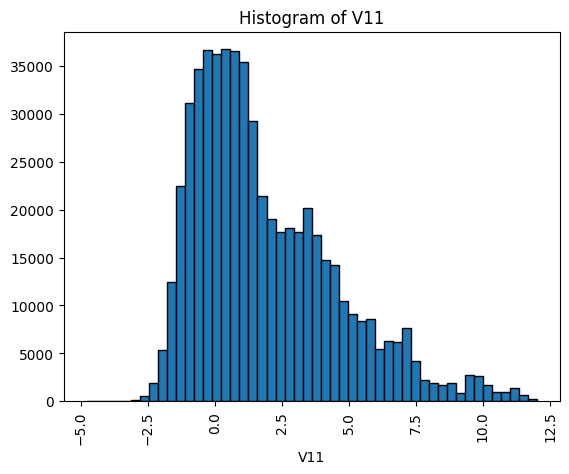

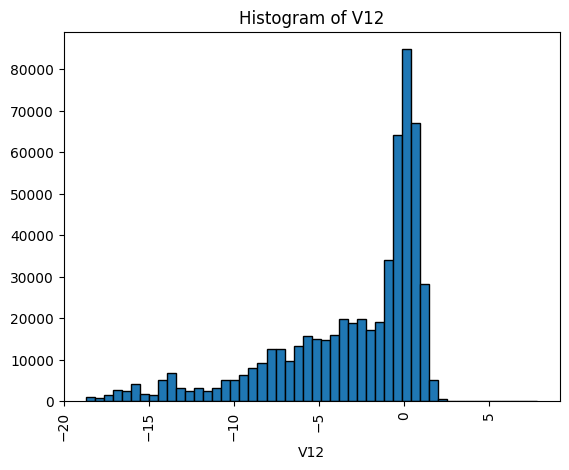

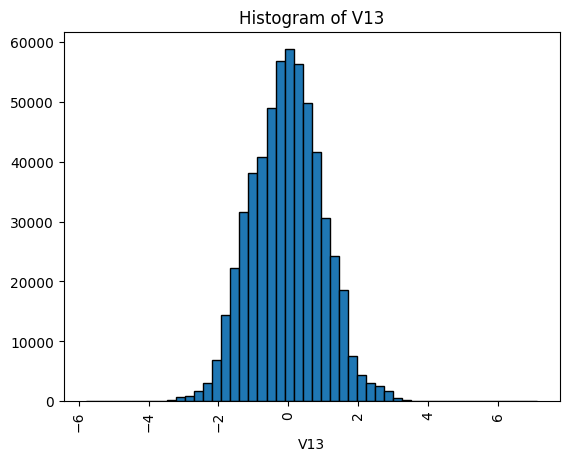

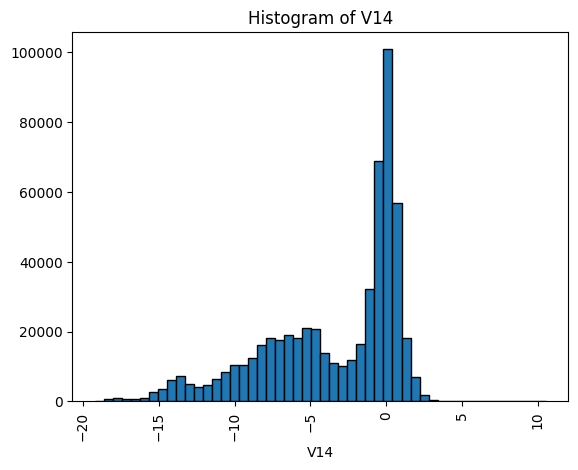

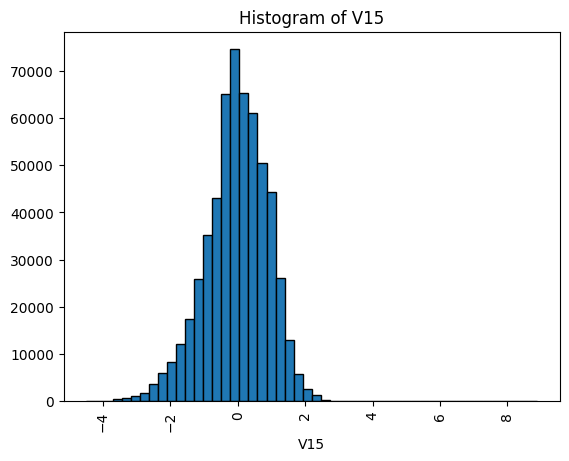

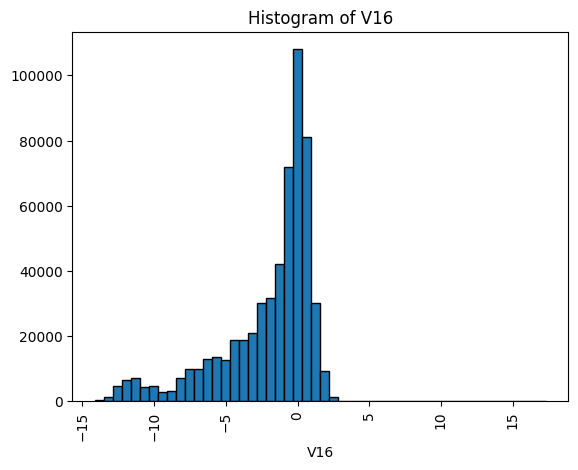

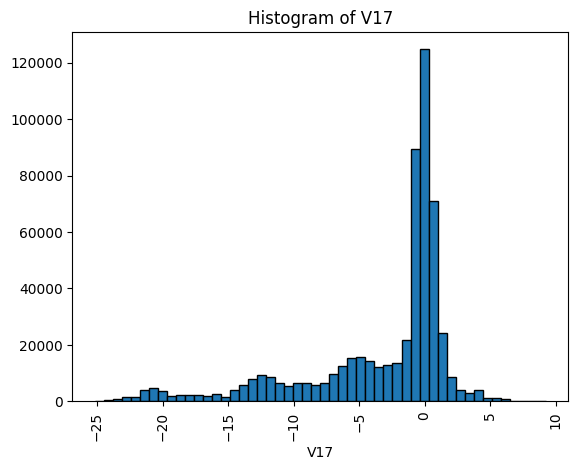

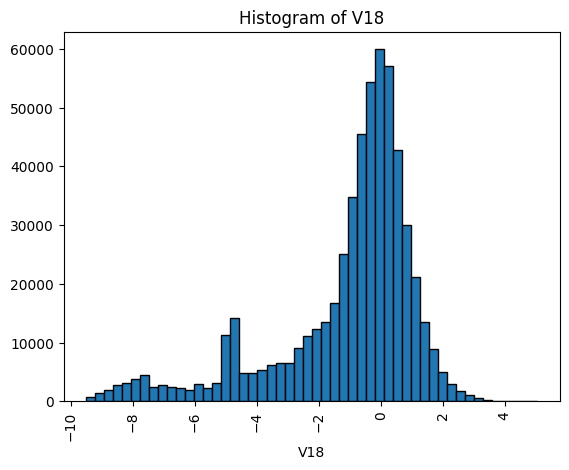

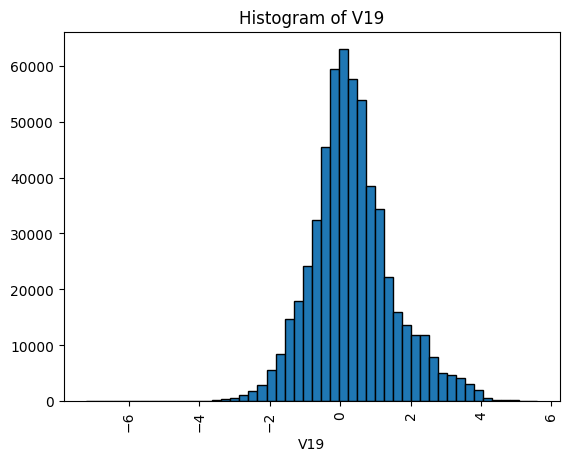

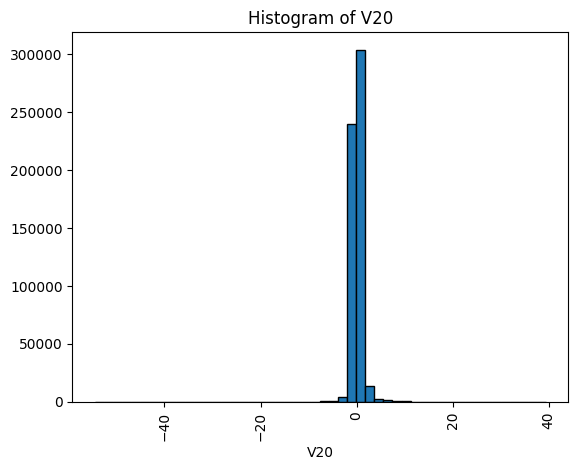

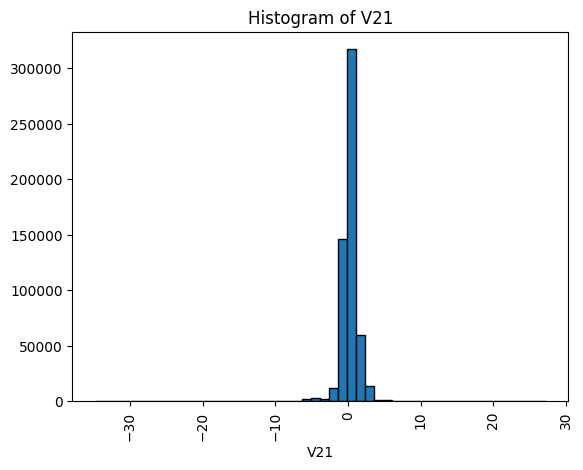

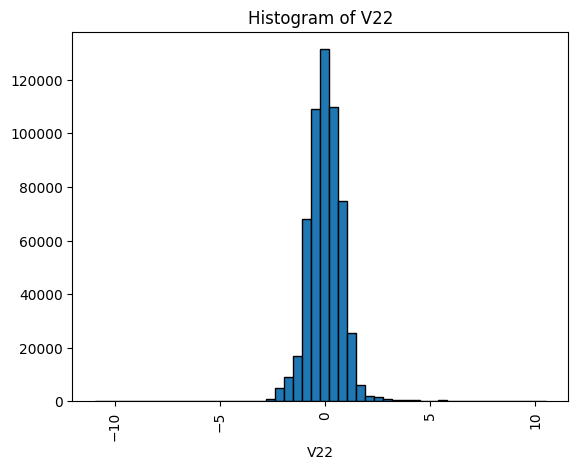

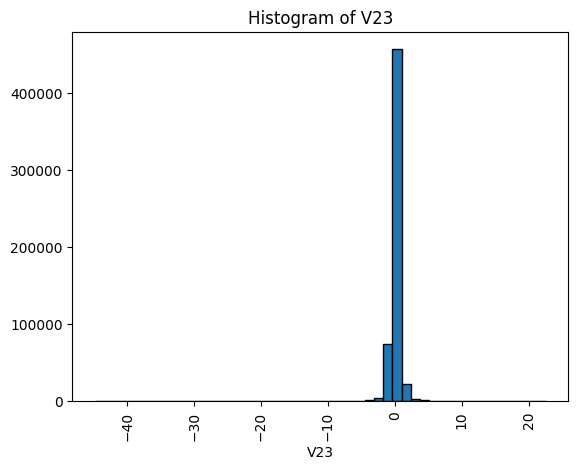

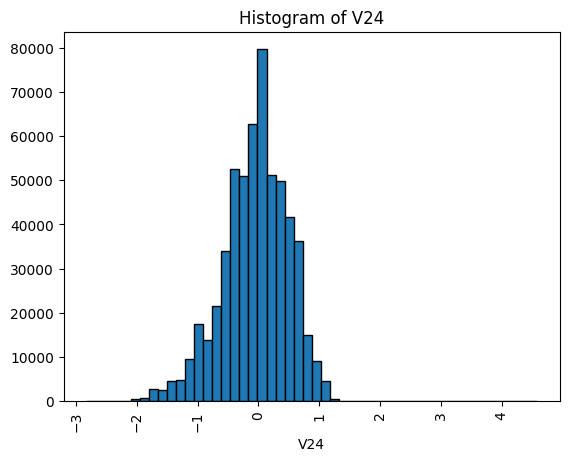

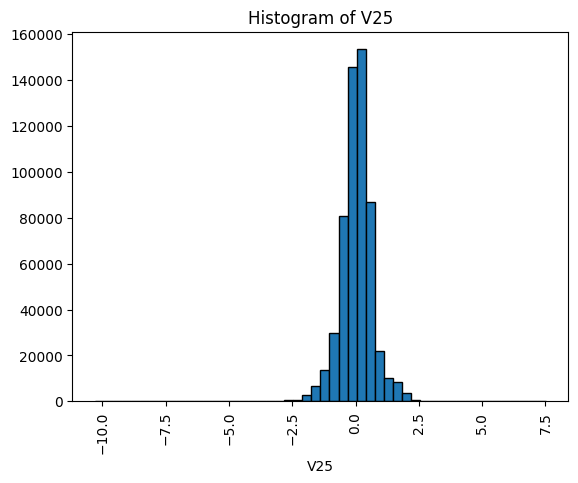

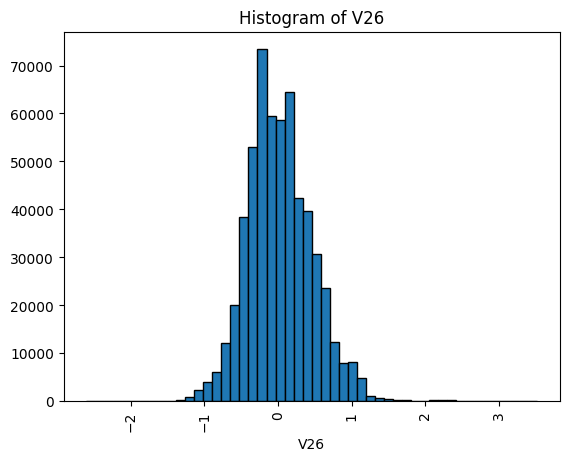

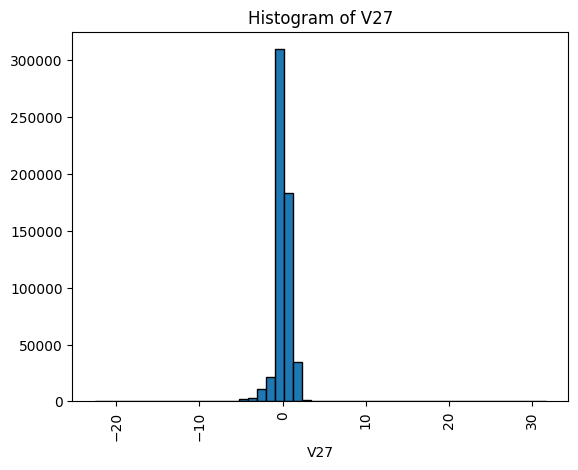

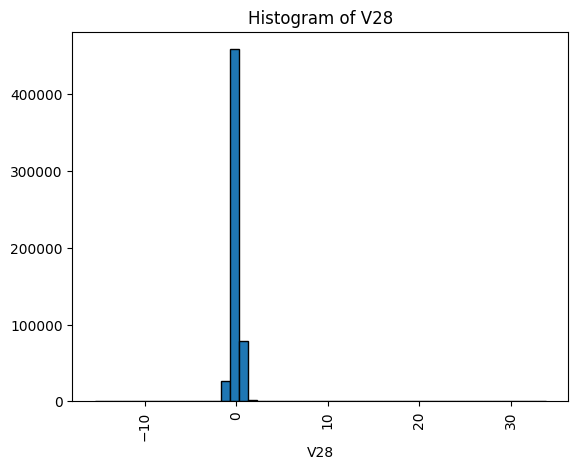

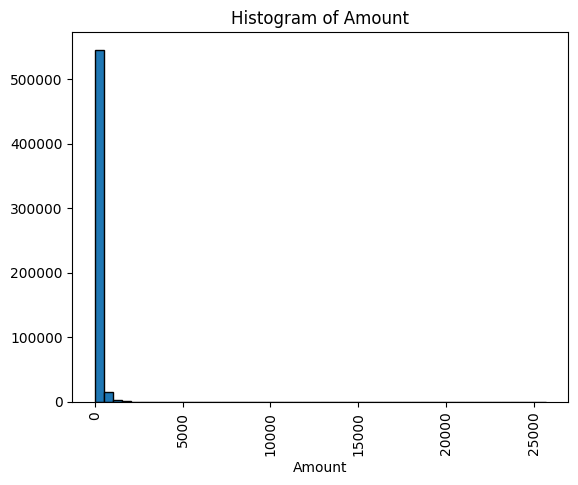

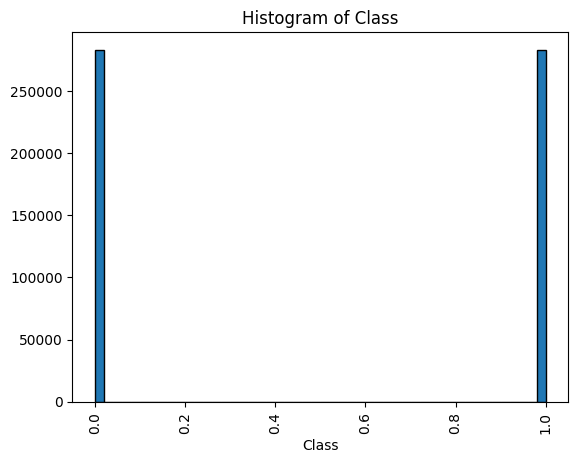

In [42]:
for col in reasmpled_data.columns:
    plt.hist(reasmpled_data[col], bins=50, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.show()

In [43]:
reasmpled_data.Class.unique()

array([0, 1])

In [44]:
reasmpled_data.Class.value_counts()

,count
Class,
0,283253
1,283253


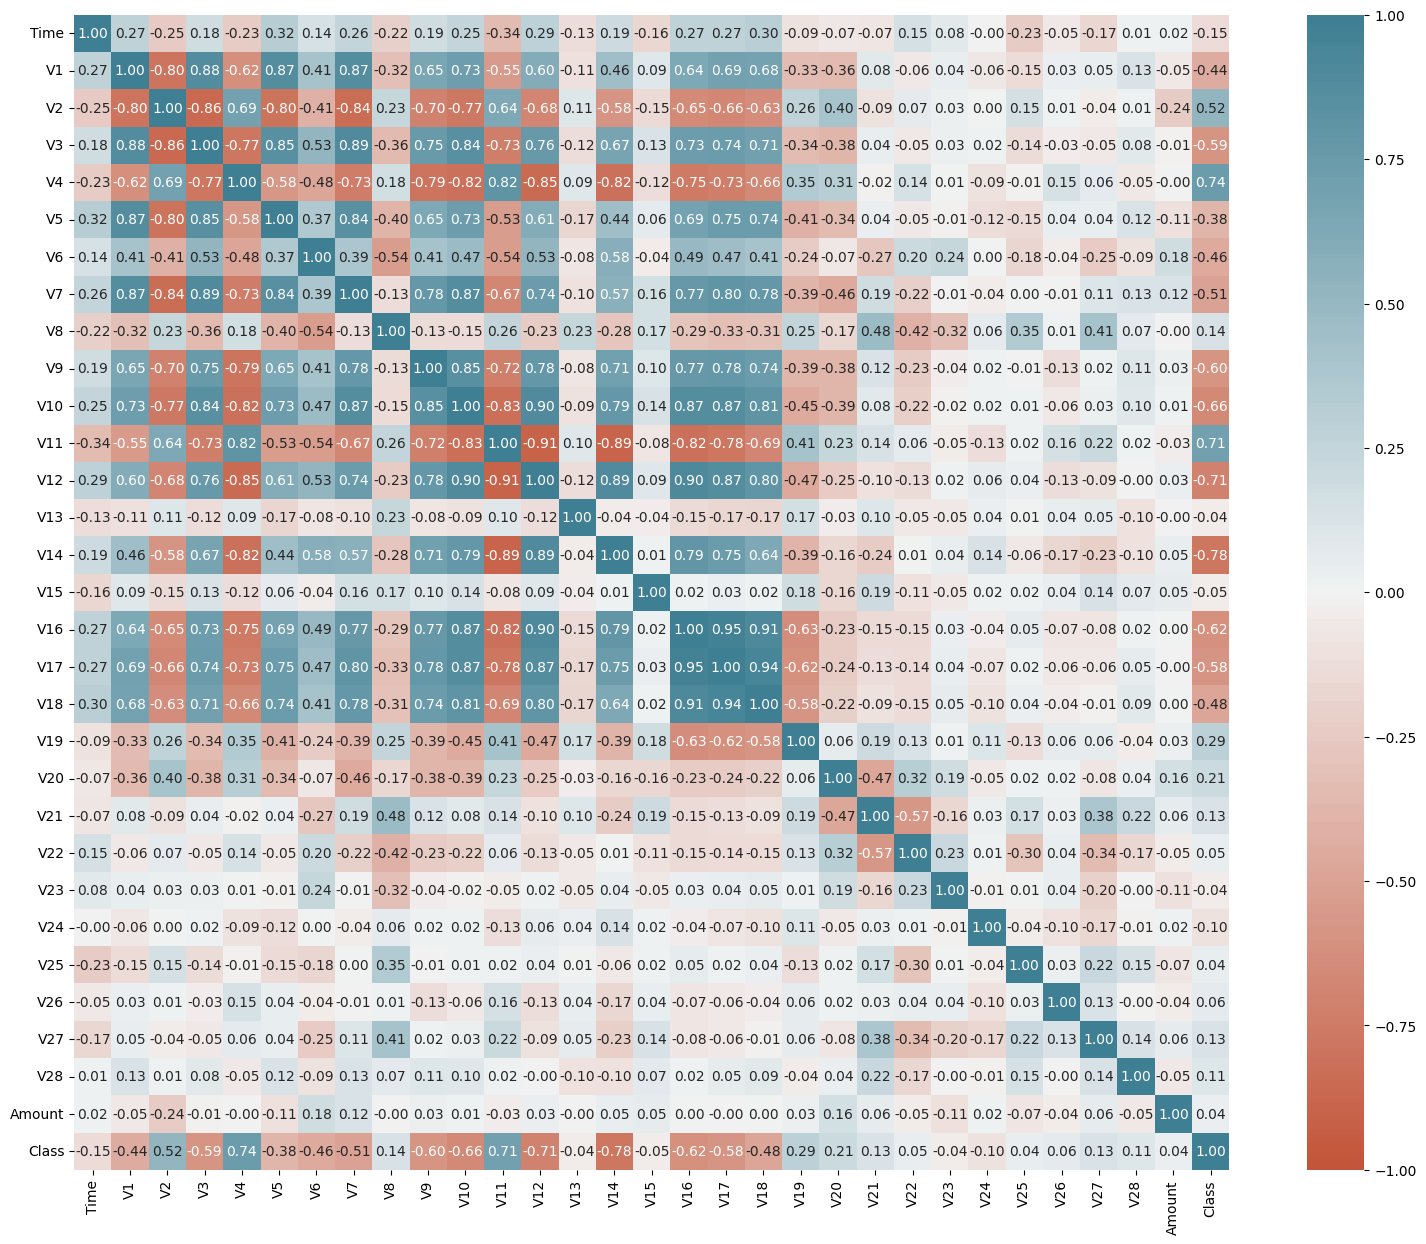

In [45]:
correlation_matrix = reasmpled_data.corr()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(
    correlation_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    fmt=".2f",
    annot=True
)

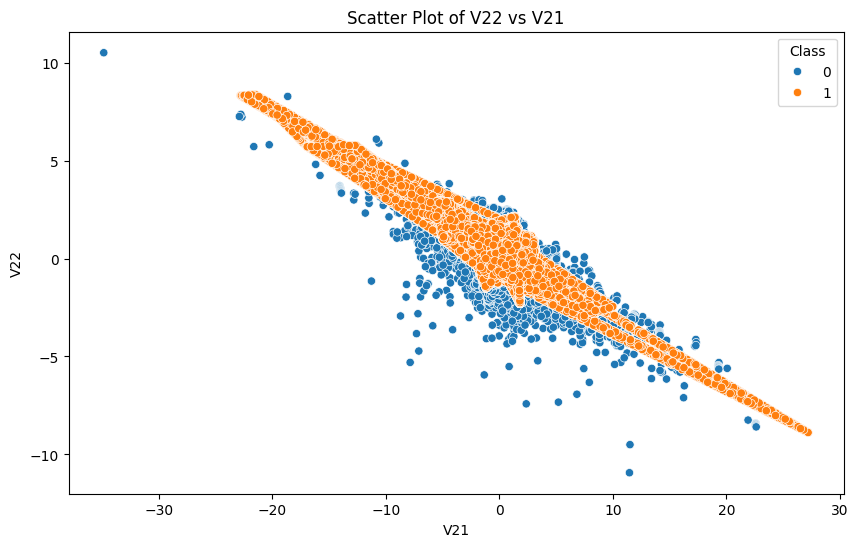

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='V21', y='V22', data=reasmpled_data, hue='Class')
plt.title('Scatter Plot of V22 vs V21')
plt.xlabel('V21')
plt.ylabel('V22')
plt.show()

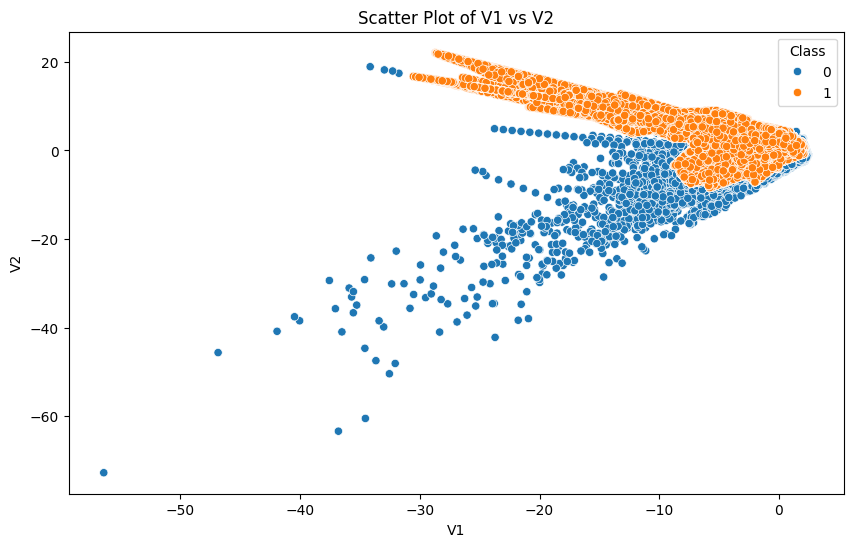

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='V1', y='V2', data=reasmpled_data, hue='Class')
plt.title('Scatter Plot of V1 vs V2')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

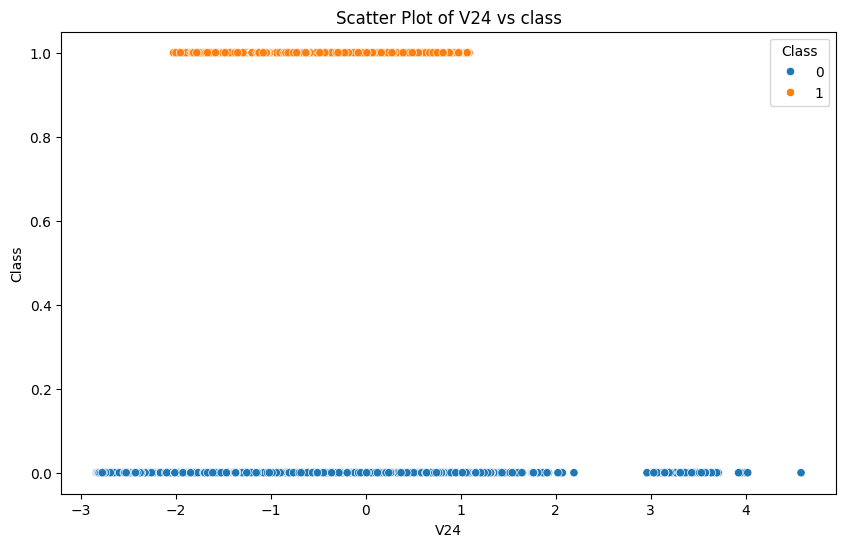

In [48]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='V24', y='Class', data=reasmpled_data, hue='Class')
plt.title('Scatter Plot of V24 vs class')
plt.xlabel('V24')
plt.ylabel('Class')
plt.show()

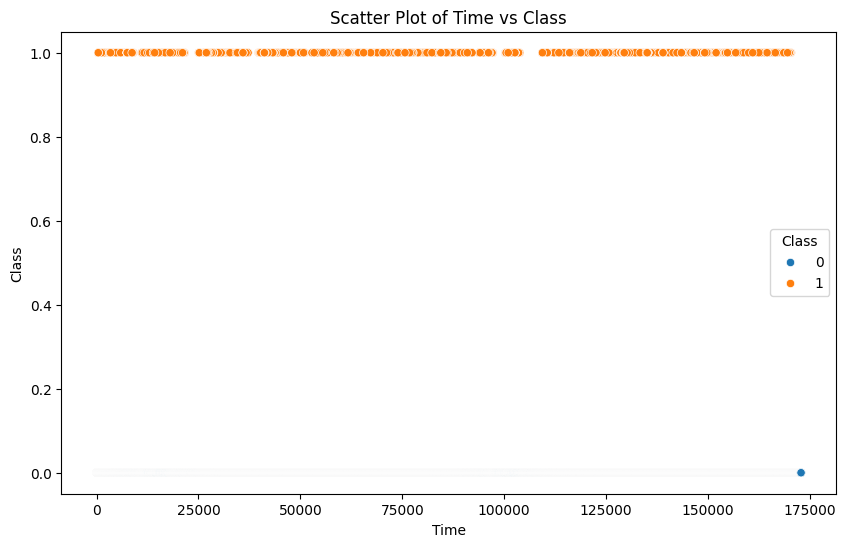

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Class', data=reasmpled_data, hue='Class')
plt.title('Scatter Plot of Time vs Class')
plt.xlabel('Time')
plt.ylabel('Class')
plt.show()

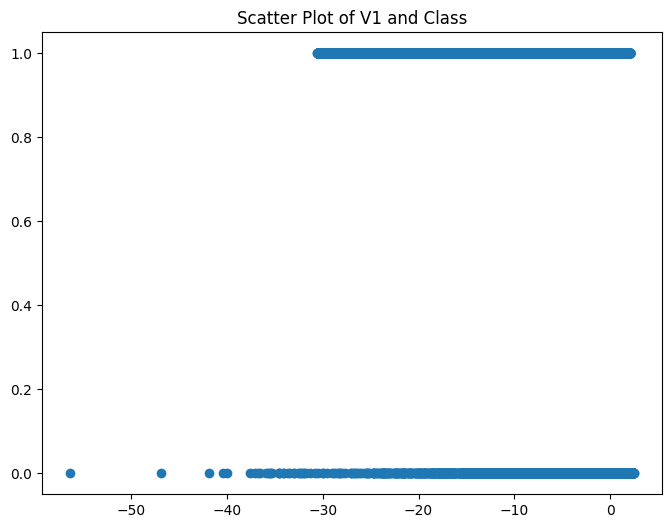

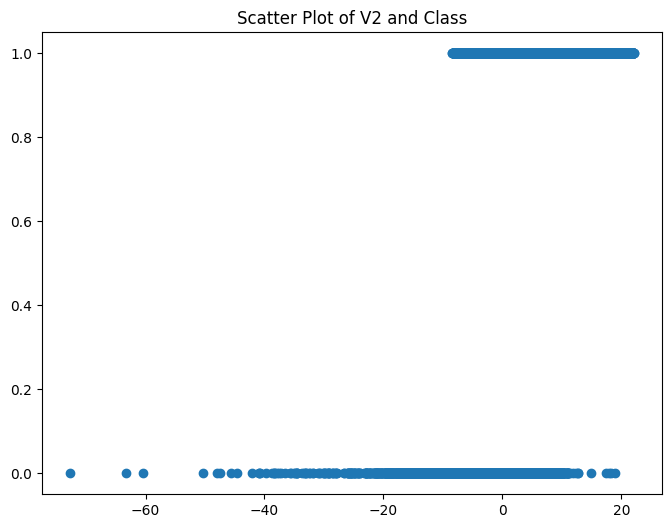

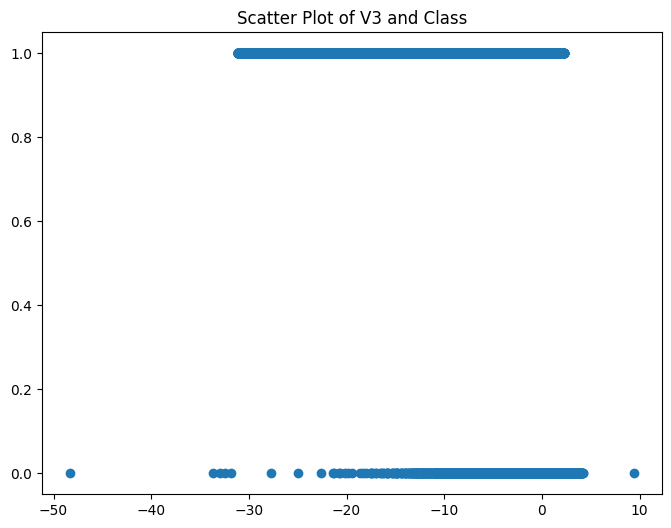

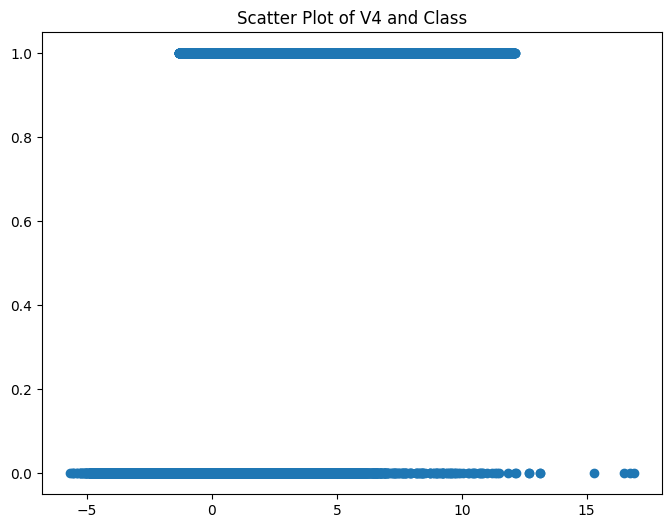

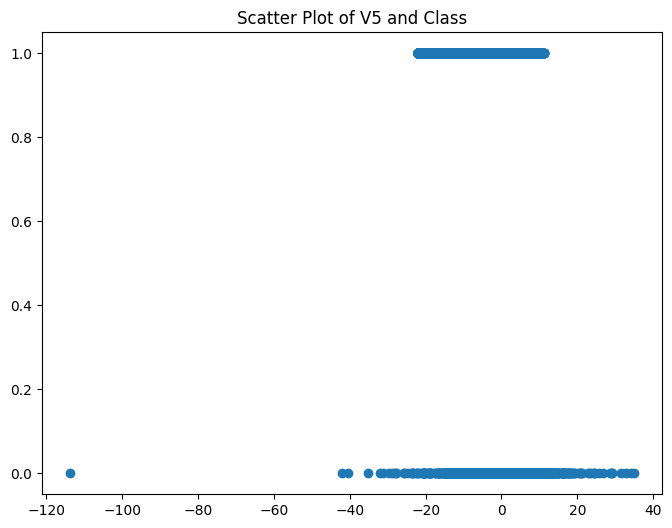

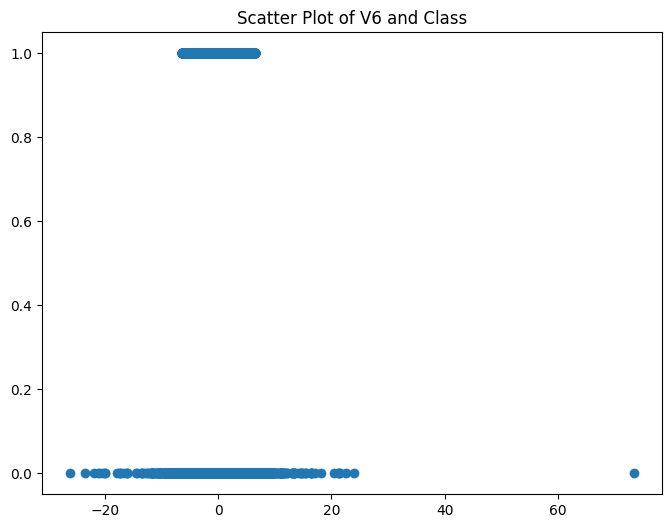

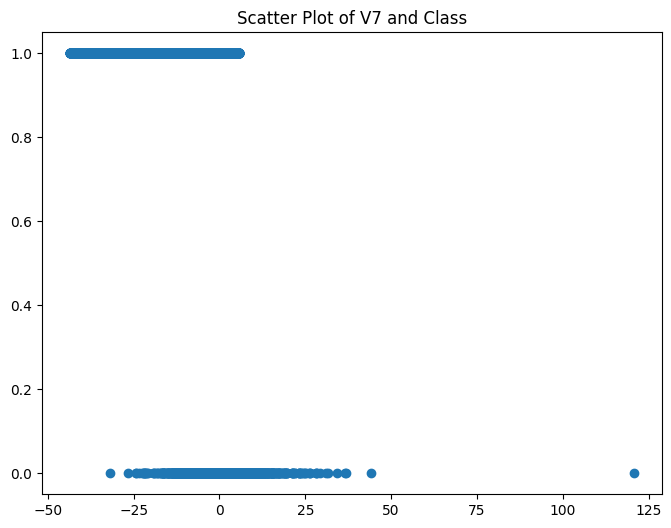

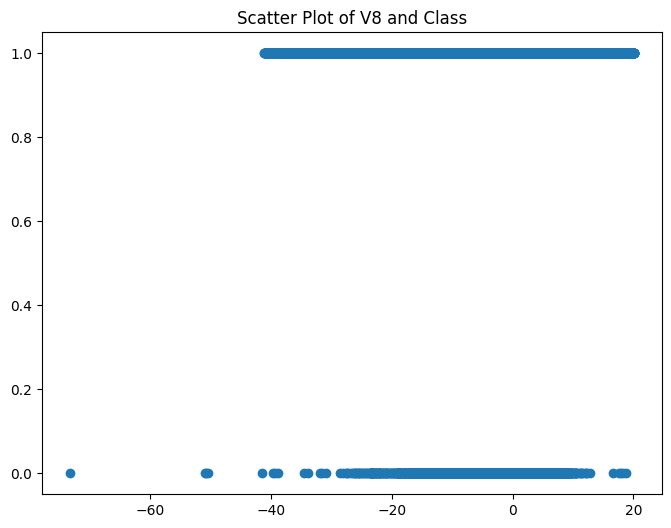

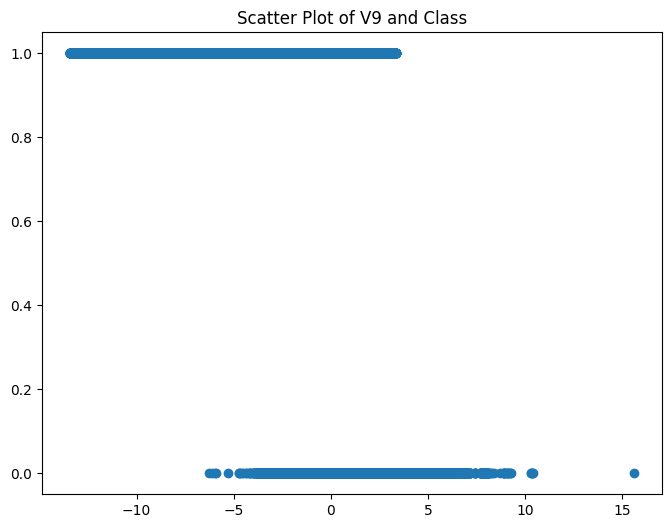

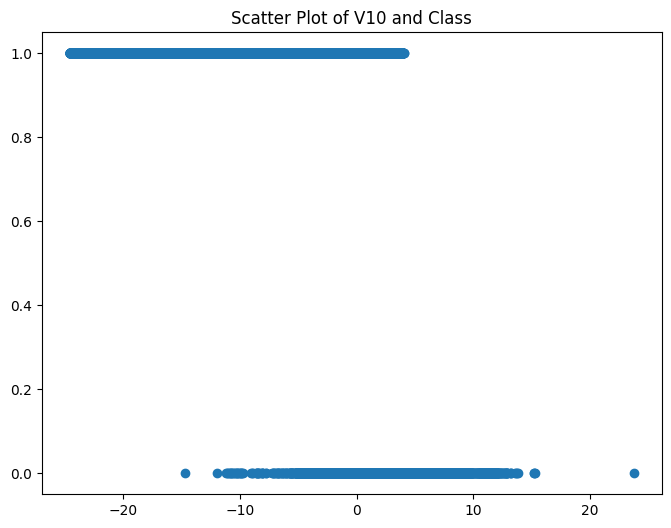

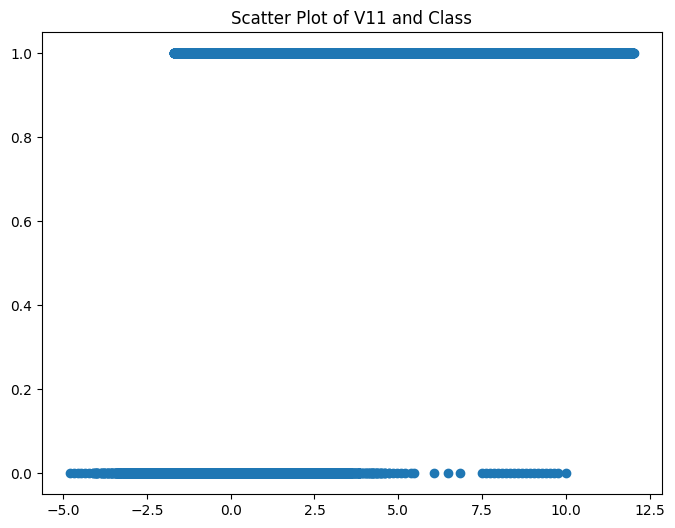

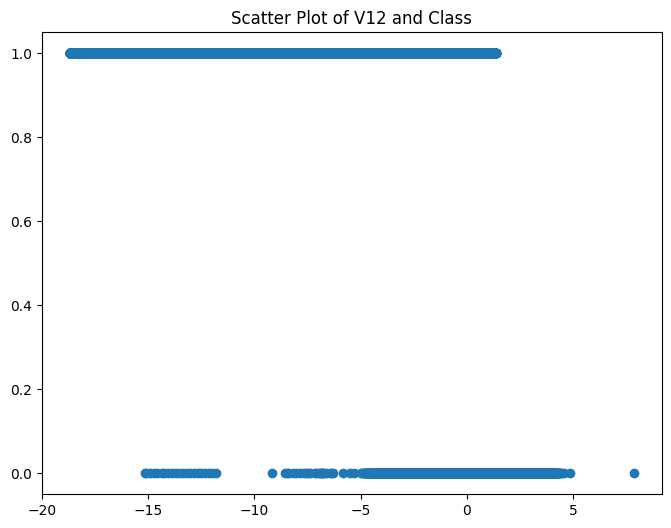

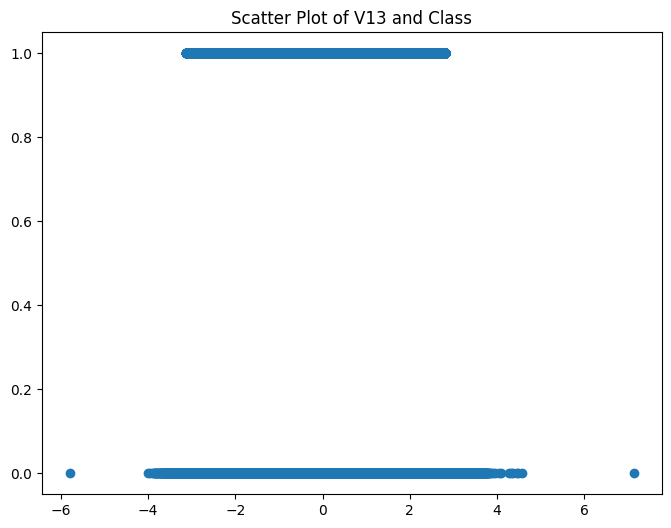

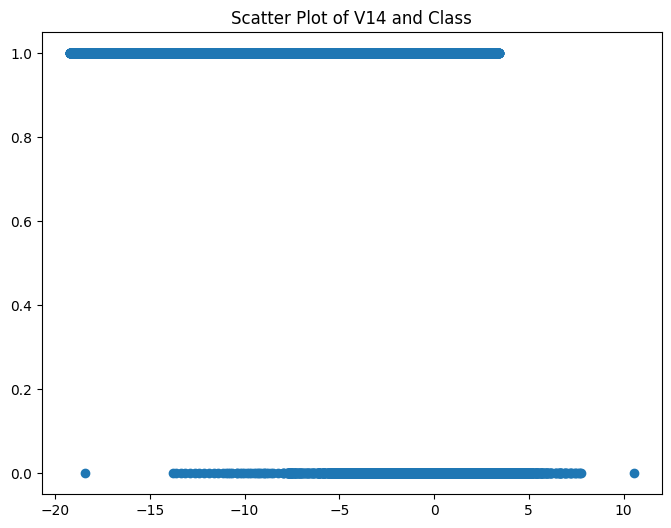

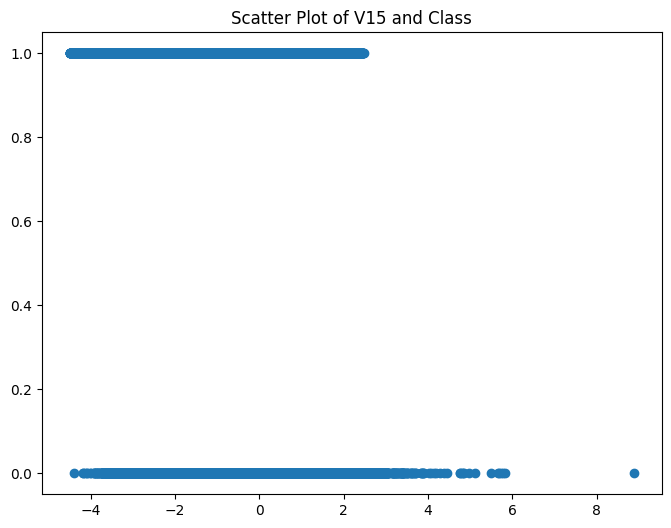

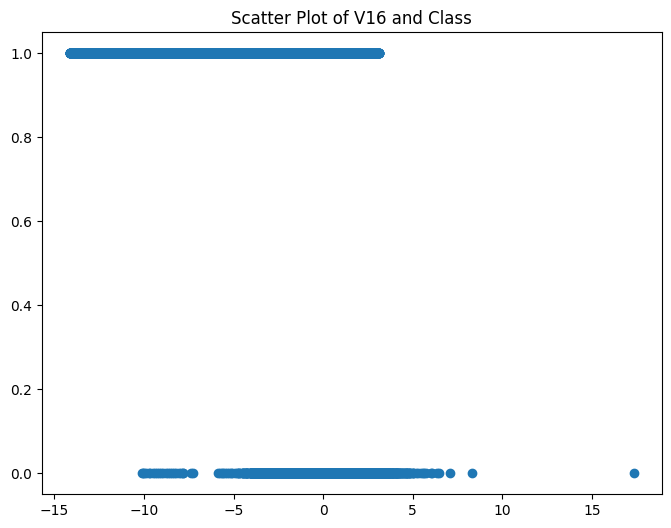

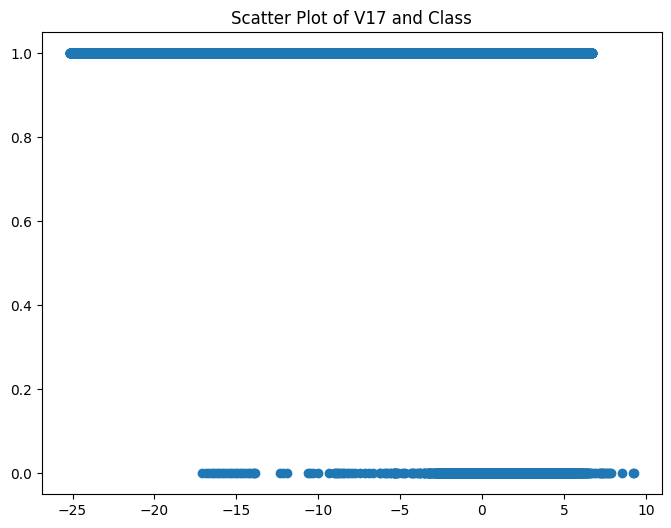

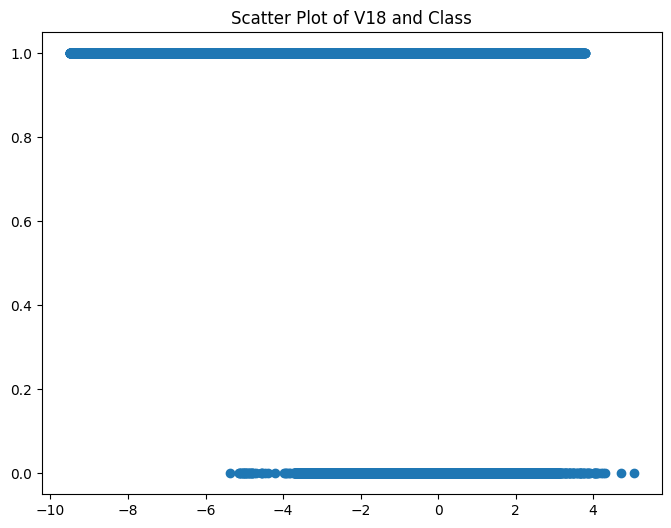

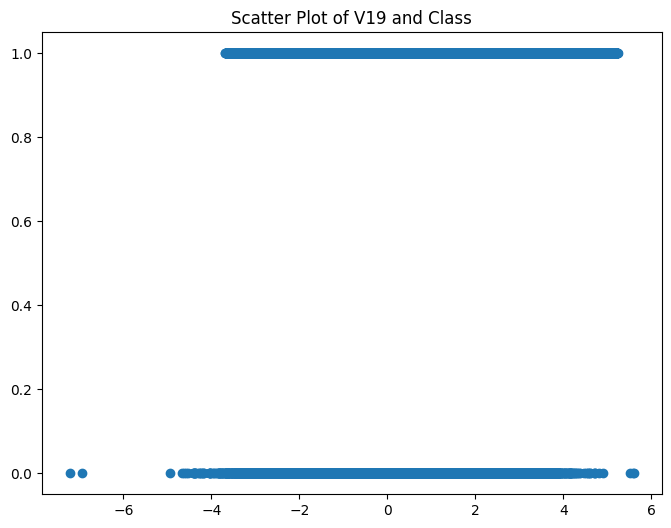

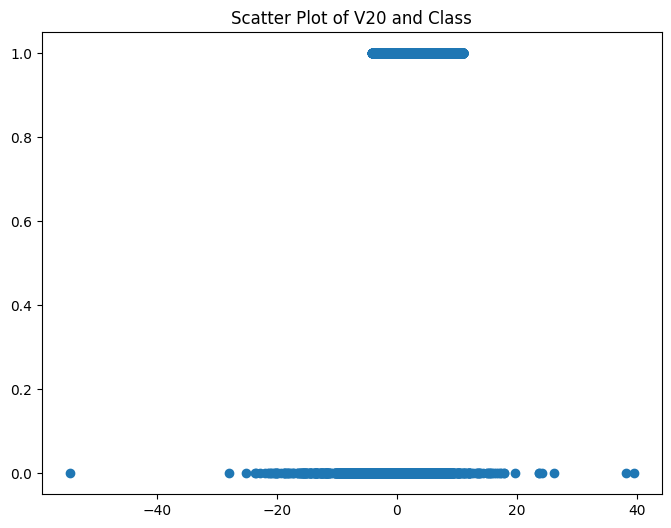

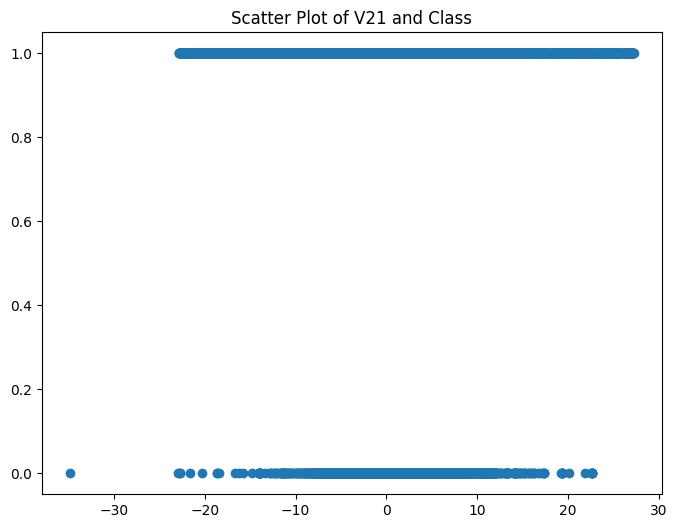

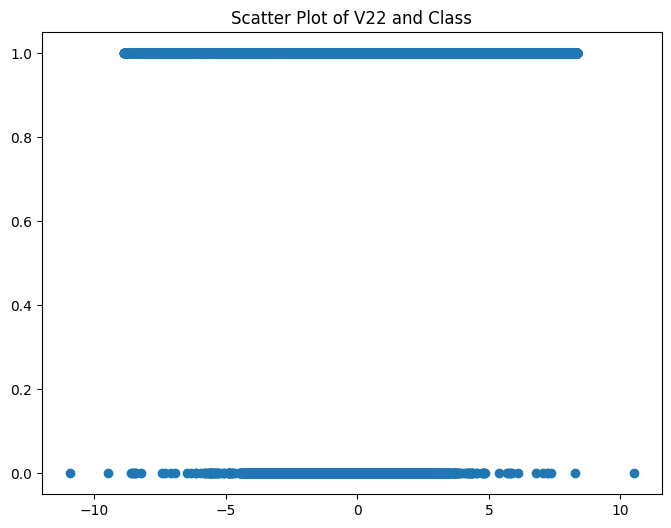

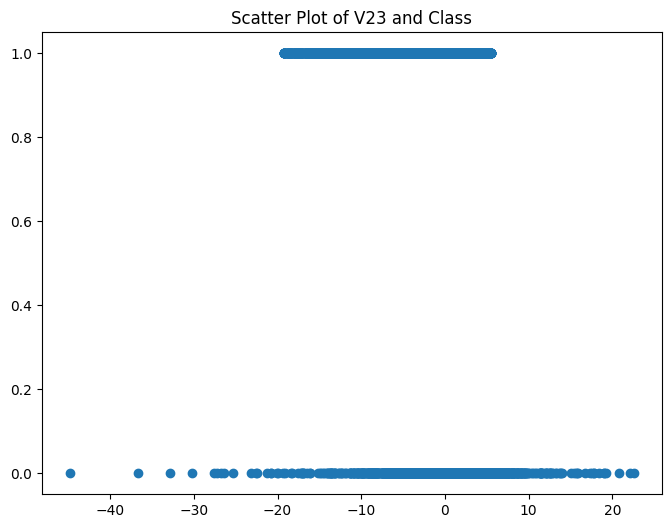

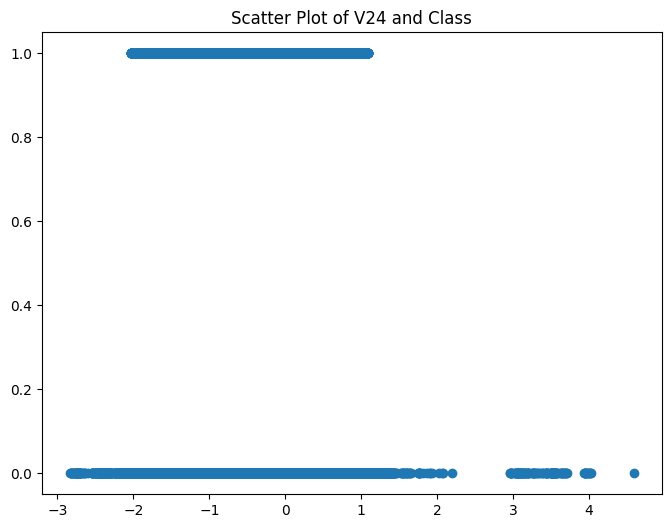

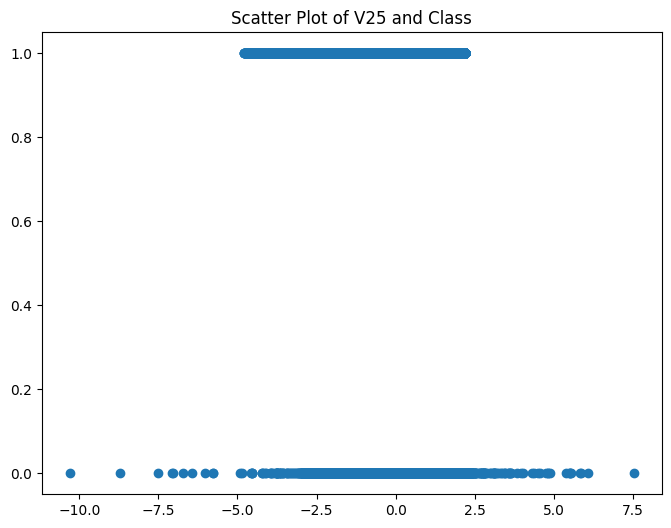

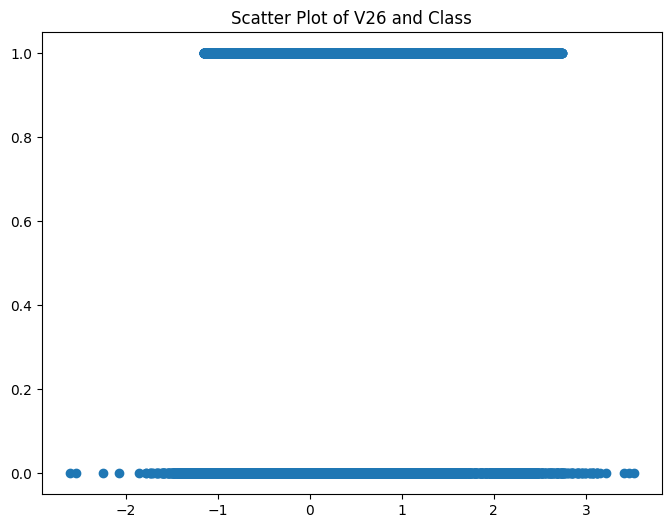

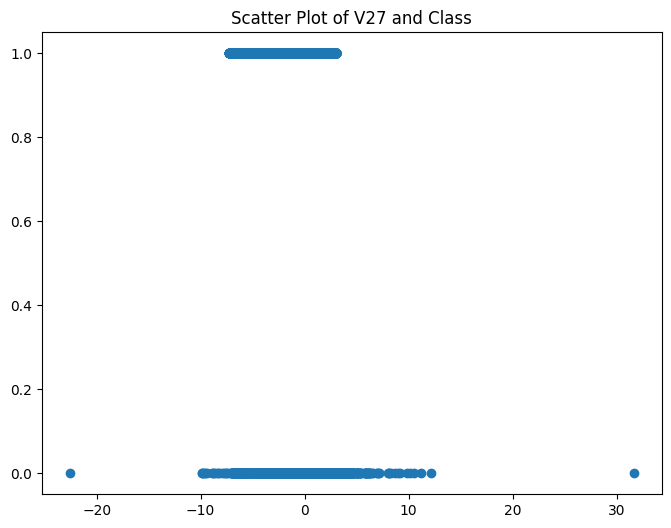

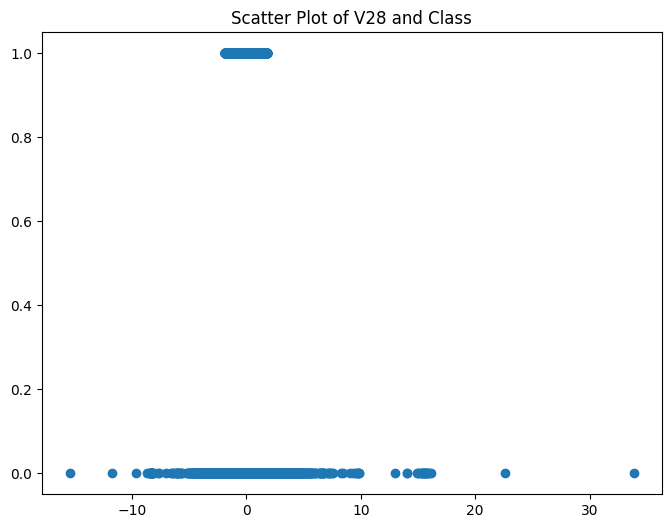

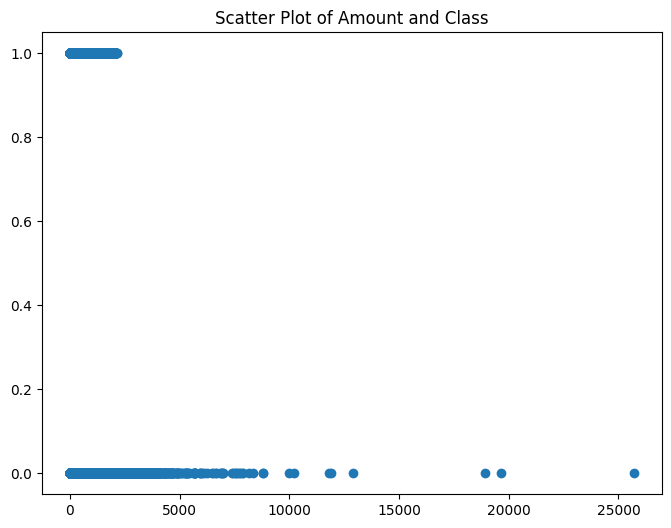

In [50]:
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(reasmpled_data[col], reasmpled_data['Class'])
    plt.title(f'Scatter Plot of {col} and Class')
    plt.show()

In [51]:
X = reasmpled_data.drop('Class', axis=1)
y = reasmpled_data['Class']
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566501,41183.445750,-7.151786,5.337862,-10.524210,6.638176,-7.107253,-3.688276,-11.629728,4.641323,-6.040679,...,0.865194,2.101089,-0.223411,0.029599,0.393875,-0.049155,0.544700,1.306198,0.223600,17.434148
566502,14264.057012,-4.705909,8.250299,-14.559164,9.787990,-4.117161,-3.169121,-10.169571,4.500750,-5.177936,...,1.306372,1.988732,0.194092,0.480124,-1.079562,-0.444215,0.557467,1.234855,0.627900,1.699263
566503,135064.971368,0.407366,1.352354,-4.892782,3.554728,-1.282114,-1.271505,-0.977517,0.462476,-1.442286,...,0.997144,0.765180,0.703300,0.814076,0.814930,-0.300969,0.168339,0.236775,0.037244,282.964802
566504,109361.849259,0.580032,2.773047,-5.790024,5.606953,0.398480,-0.621865,-2.954884,0.837074,-1.822486,...,0.375281,0.311488,-0.810361,-0.067584,-0.632356,0.414552,0.073243,0.736440,0.358067,4.145185


In [52]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
566501,1
566502,1
566503,1
566504,1


In [53]:
#scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
X_scaled

array([[-1.80610773,  0.17923684, -0.53692435, ...,  0.03086151,
        -0.15892803,  0.23896758],
       [-1.80610773,  0.6677371 , -0.43836107, ..., -0.13914678,
        -0.07044951, -0.42456546],
       [-1.80608713,  0.17951502, -0.90548605, ..., -0.19445161,
        -0.25463171,  1.27330779],
       ...,
       [ 0.97640133,  0.5175511 , -0.12248698, ...,  0.15396772,
        -0.01475632,  0.84115012],
       [ 0.44688454,  0.55060699,  0.29065826, ...,  0.74991416,
         0.77865047, -0.41799387],
       [-0.06656686, -0.10015057,  0.18523599, ...,  1.54904397,
         0.68268712, -0.41010288]])

In [55]:
X_scaled.shape

(566506, 30)

In [56]:
reasmpled_data['Class'].shape

(566506,)

In [57]:
# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

models

In [58]:
from sklearn.ensemble import RandomForestClassifier,StackingClassifier

In [59]:
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
)

# Fit the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Calculate accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {acc_rf:.4f}")

Random Forest Classifier Accuracy: 0.9999


In [60]:
df_test = pd.read_csv('/content/Classification_Test_file.csv')

In [61]:
df_test_scaled = scaler.transform(df_test)
y_pred = rf_clf.predict(df_test_scaled)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [63]:
# Create the DataFrame
result_df = pd.DataFrame({'ID': range(994), 'Class': y_pred})
result_df


,ID,Class
0,0,0
1,1,0
2,2,0
3,3,1
4,4,1
...,...,...
989,989,1
990,990,0
991,991,0
992,992,1


In [65]:
from google.colab import files


In [66]:
# Save to CSV
result_df.to_csv('submission.csv', index=False)

# Download the file
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>